<h1><center>Investigation of loan data from Prosper</center></h1>

### Investigation Overview

**This notebook** covers the **data wrangling process** and an **exploratory investigation** of the dataset. If you are just interested in a polished explanatory analysis, then please refer to the ``findings_report.html`` document.

In this project I want to gain an insight into loan characteristics from the peer-to-peer loan marketplace [Prosper](https://www.prosper.com/). The Investigation in the **exploratory** analyses will be centered around four questions: 

- What causes people to take loans in the first place?
- What determines a borrowers apr?
- What affects the probabilities for different outcomes?
- Did the borrowers average apr change over time?

The previously mentioned ``findings_report`` is solely focused on credit default rates.

### Dataset Overview

The cleaned dataset contains information about 105.000 transactions across 21 columns. Around 8.000 rows and 60 columns were removed from the original dataset for quality and tidiness purposes.

#### The variables in the cleaned dataframe include

- id: a unique key for every transaction
- date: the date the listing was created
- status: the status of the loan/outcome if applicable
- loan_amount: the loan amount borrowed
- credit_rating: Prosper's credit score with 1 being the worst and 7 the best
- borrower_apr: the apr (annual percentage rate = interest rate plus fees) of the borrower
- lender_yield: the interest rate you receive as a lender minus servicing fees
- bank_yield: the difference between lender_yield and borrower_apr = Prospers share in every deal
- income_range: yearly income of borrower
- monthly_income: monthly income of borrower
- income_verifiable: True if the borrower has documents to proof his stated monthly income
- homeowner: True if borrower already owns a home, False if not
- occupation: occupation of borrower, 21 categories
- employment_status: borrowers type of employment
- employment_status_duration: specifies how long the borrower is already employed (if applicable)
- homestate: state the borrower lives in
- reason: reason specified by borrower why he needs a loan
- credit_utilization: percentage of available revolving credit that is utilized by the borrower
- number_delinquencies: number of borrowers delinquencies in the last 7 years.

### Table of Contents
- [Assessing and Cleaning](#assessing)
- [Analyzing and Visualizing](#analyzing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.plotly as py
import plotly.figure_factory as ff
% matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('prosperLoanData.csv')

## Assessing and Cleaning
<a id='assessing'></a>

In [3]:
# create a copy of the df for cleaning purposes
df_clean = df.copy()

In [4]:
df_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


#### Define

The DataFrame in its current form contains 81 rows, many of which contain data I'm not particularly interested in for this project. I'll only keep the following 21 columns, and assign them more appropriate names in the next step.

#### Code

In [5]:
# define columns I want to keep
df_clean = df_clean[['ListingNumber',
                     'ListingCreationDate',
                     'LoanOriginalAmount',
                     'LoanStatus',
                     'CreditGrade',
                     'ProsperRating (numeric)',
                     'BorrowerAPR',
                     'LenderYield',
                     'IncomeRange',
                     'StatedMonthlyIncome',
                     'IncomeVerifiable',
                     'MonthlyLoanPayment',
                     'DebtToIncomeRatio',
                     'IsBorrowerHomeowner',
                     'Occupation',
                     'EmploymentStatus',
                     'EmploymentStatusDuration',
                     'BorrowerState',
                     'ListingCategory (numeric)',
                     'BankcardUtilization',
                     'DelinquenciesLast7Years']]

In [6]:
# rename columns
df_clean.columns = ['id',
                    'date',
                    'loan_amount',
                    'status',
                    'credit_grade',
                    'prosper_score',
                    'borrower_apr',
                    'lender_yield',
                    'income_range',
                    'monthly_income',
                    'income_verifiable',
                    'monthly_loan_payment',
                    'debt_ratio',
                    'homeowner',
                    'occupation',
                    'employment_status',
                    'employment_status_duration',
                    'homestate',
                    'reason',
                    'credit_utilization',
                    'number_delinquencies']

#### Test

In [7]:
df_clean.head(2)

,id,date,loan_amount,status,credit_grade,prosper_score,borrower_apr,lender_yield,income_range,monthly_income,...,monthly_loan_payment,debt_ratio,homeowner,occupation,employment_status,employment_status_duration,homestate,reason,credit_utilization,number_delinquencies
0,193129,2007-08-26 19:09:29.263000000,9425,Completed,C,NaN,0.16516,0.138,"$25,000-49,999",3083.333333,...,330.43,0.17,True,Other,Self-employed,2.0,CO,0,0.00,4.0
1,1209647,2014-02-27 08:28:07.900000000,10000,Current,NaN,6.0,0.12016,0.082,"$50,000-74,999",6125.000000,...,318.93,0.18,False,Professional,Employed,44.0,CO,2,0.21,0.0


#### Define

The column ``credit_grade`` contains prospers credit ratings prior to 2009, the column ``prosper_score`` contains credit ratings applicable to loans after 2009. I want to combine both columns into one column containing the credit rating for both periods. The alphanumerical rating of the ``credit_grade`` grade column can be encoded as follows: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. 

#### Code

In [8]:
# encode credit_grade column
df_clean.credit_grade = df_clean.credit_grade.map({'HR': 1,
                                                   'E': 2,
                                                   'D': 3,
                                                   'C': 4,
                                                   'B': 5,
                                                   'A': 6,
                                                   'AA': 7})

# replace all NaN values with 0 so both columns can be added
df_clean[['credit_grade', 'prosper_score']] = df_clean[['credit_grade', 'prosper_score']].fillna(0)

# create new column credit_rating which is the sum of credit_grade and prosper_score.
df_clean['credit_rating'] = df_clean.credit_grade + df_clean.prosper_score
# drop old columns
df_clean.drop(columns = ['credit_grade', 'prosper_score'],
              axis = 1, inplace = True)

#### Test

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
id                            113937 non-null int64
date                          113937 non-null object
loan_amount                   113937 non-null int64
status                        113937 non-null object
borrower_apr                  113912 non-null float64
lender_yield                  113937 non-null float64
income_range                  113937 non-null object
monthly_income                113937 non-null float64
income_verifiable             113937 non-null bool
monthly_loan_payment          113937 non-null float64
debt_ratio                    105383 non-null float64
homeowner                     113937 non-null bool
occupation                    110349 non-null object
employment_status             111682 non-null object
employment_status_duration    106312 non-null float64
homestate                     108422 non-null object
reason                        113937 non-

#### Define

The column ``reason`` is also numerically encoded. I want to use the actual label here as it improves comprehensibility in my opinion.

#### Code

In [10]:
reason_encoding = {0: 'Not Available',
                   1: 'Debt Consolidation',
                   2: 'Home Improvement',
                   3: 'Business',
                   4: 'Personal Loan',
                   5: 'Student Loan',
                   6: 'Car', 7: 'Other',
                   8: 'Baby/Adoption',
                   9: 'Boat',
                   10: 'Cosmetic Procedure',
                   11: 'Engagement Ring',
                   12: 'Green Loans',
                   13: 'Household Expenses',
                   14: 'Large Purchases',
                   15: 'Medical/Dental',
                   16: 'Motorcycle',
                   17: 'RV',
                   18: 'Taxes',
                   19: 'Vacation',
                   20: 'Wedding Loans'}

df_clean.reason = df_clean.reason.map(reason_encoding)

#### Test

In [11]:
df_clean.reason.sample(2)

20939    Not Available
3274          Business
Name: reason, dtype: object

#### Define

There are rows which contain no value for the borrower_apr (average percentage rate). As this is one key metric, I'm going to drop all rows which contain NaN for borrower_apr.

#### Code

In [12]:
df_clean.dropna(subset = ['borrower_apr'], inplace = True)

#### Test

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 20 columns):
id                            113912 non-null int64
date                          113912 non-null object
loan_amount                   113912 non-null int64
status                        113912 non-null object
borrower_apr                  113912 non-null float64
lender_yield                  113912 non-null float64
income_range                  113912 non-null object
monthly_income                113912 non-null float64
income_verifiable             113912 non-null bool
monthly_loan_payment          113912 non-null float64
debt_ratio                    105358 non-null float64
homeowner                     113912 non-null bool
occupation                    110349 non-null object
employment_status             111682 non-null object
employment_status_duration    106312 non-null float64
homestate                     108422 non-null object
reason                        113912 non-

#### Define

I want to introduce one more column ``bank_yield``. The bank yield is the difference between the borrowers APR and the lenders yield (the lenders return for on investment) and thus provides information about prospers share on each deal. 

Then, reorder the columns so the rating and bank_yield are not at the very end.

#### Code

In [14]:
df_clean['bank_yield'] = df_clean['borrower_apr'] - df_clean['lender_yield']

In [15]:
cols = df_clean.columns.tolist()
cols

['id',
 'date',
 'loan_amount',
 'status',
 'borrower_apr',
 'lender_yield',
 'income_range',
 'monthly_income',
 'income_verifiable',
 'monthly_loan_payment',
 'debt_ratio',
 'homeowner',
 'occupation',
 'employment_status',
 'employment_status_duration',
 'homestate',
 'reason',
 'credit_utilization',
 'number_delinquencies',
 'credit_rating',
 'bank_yield']

In [16]:
cols = ['id',
        'date',
        'status',
        'loan_amount',
        'credit_rating',
        'borrower_apr',
        'lender_yield',
        'bank_yield',
        'income_range',
        'monthly_income',
        'income_verifiable',
        'monthly_loan_payment',
        'debt_ratio',
        'homeowner',
        'occupation',
        'employment_status',
        'employment_status_duration',
        'homestate',
        'reason',
        'credit_utilization',
        'number_delinquencies']

df_clean = df_clean[cols]

#### Test

In [17]:
df_clean.head(2)

,id,date,status,loan_amount,credit_rating,borrower_apr,lender_yield,bank_yield,income_range,monthly_income,...,monthly_loan_payment,debt_ratio,homeowner,occupation,employment_status,employment_status_duration,homestate,reason,credit_utilization,number_delinquencies
0,193129,2007-08-26 19:09:29.263000000,Completed,9425,4.0,0.16516,0.138,0.02716,"$25,000-49,999",3083.333333,...,330.43,0.17,True,Other,Self-employed,2.0,CO,Not Available,0.00,4.0
1,1209647,2014-02-27 08:28:07.900000000,Current,10000,6.0,0.12016,0.082,0.03816,"$50,000-74,999",6125.000000,...,318.93,0.18,False,Professional,Employed,44.0,CO,Home Improvement,0.21,0.0


#### Define

There are 8669 occasions where the borrower can not verify the stated monthly income. As this makes it impossible to assess whether those values are indeed valid or not, I'm going to drop those rows.

In [18]:
df_clean.income_verifiable.value_counts()

True     105243
False      8669
Name: income_verifiable, dtype: int64

#### Code

In [19]:
df_clean = df_clean[df_clean['income_verifiable'] == True]

#### Test

In [20]:
df_clean.income_verifiable.unique()

array([ True])

#### Define

- Change dtype of ``id`` to str
- Change dtype of ``date`` to datetime
- Change dtype of ``monthly_income`` to int (I'm fine with rounding here)
- Change dtype of ``monthly_loan_payment`` to int (I'm fine with rounding here)

#### Code

In [21]:
df_clean.id = df_clean.id.astype(str)
df_clean.date = pd.to_datetime(df_clean.date, yearfirst = True).dt.normalize()
df_clean.monthly_income = df_clean.monthly_income.astype(int)
df_clean.monthly_loan_payment = df_clean.monthly_loan_payment.astype(int)

#### Test

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105243 entries, 0 to 113936
Data columns (total 21 columns):
id                            105243 non-null object
date                          105243 non-null datetime64[ns]
status                        105243 non-null object
loan_amount                   105243 non-null int64
credit_rating                 105243 non-null float64
borrower_apr                  105243 non-null float64
lender_yield                  105243 non-null float64
bank_yield                    105243 non-null float64
income_range                  105243 non-null object
monthly_income                105243 non-null int32
income_verifiable             105243 non-null bool
monthly_loan_payment          105243 non-null int32
debt_ratio                    105078 non-null float64
homeowner                     105243 non-null bool
occupation                    101719 non-null object
employment_status             103052 non-null object
employment_status_duration    97764

In [23]:
df_clean.head()

,id,date,status,loan_amount,credit_rating,borrower_apr,lender_yield,bank_yield,income_range,monthly_income,...,monthly_loan_payment,debt_ratio,homeowner,occupation,employment_status,employment_status_duration,homestate,reason,credit_utilization,number_delinquencies
0,193129,2007-08-26,Completed,9425,4.0,0.16516,0.1380,0.02716,"$25,000-49,999",3083,...,330,0.17,True,Other,Self-employed,2.0,CO,Not Available,0.00,4.0
1,1209647,2014-02-27,Current,10000,6.0,0.12016,0.0820,0.03816,"$50,000-74,999",6125,...,318,0.18,False,Professional,Employed,44.0,CO,Home Improvement,0.21,0.0
2,81716,2007-01-05,Completed,3001,1.0,0.28269,0.2400,0.04269,Not displayed,2083,...,123,0.06,False,Other,Not available,NaN,GA,Not Available,NaN,0.0
3,658116,2012-10-22,Current,10000,6.0,0.12528,0.0874,0.03788,"$25,000-49,999",2875,...,321,0.15,True,Skilled Labor,Employed,113.0,GA,Motorcycle,0.04,14.0
4,909464,2013-09-14,Current,15000,3.0,0.24614,0.1985,0.04764,"$100,000+",9583,...,563,0.26,True,Executive,Employed,44.0,MN,Home Improvement,0.81,0.0


#### Define

Check the monthly income for plausibility

#### Code

In [24]:
df_clean.monthly_income.describe()

count    105243.000000
mean       5654.810496
std        4937.070098
min           0.000000
25%        3333.000000
50%        4750.000000
75%        6845.500000
max      483333.000000
Name: monthly_income, dtype: float64

In [25]:
df_clean.loc[df_clean.monthly_income.nlargest(5).index]

,id,date,status,loan_amount,credit_rating,borrower_apr,lender_yield,bank_yield,income_range,monthly_income,...,monthly_loan_payment,debt_ratio,homeowner,occupation,employment_status,employment_status_duration,homestate,reason,credit_utilization,number_delinquencies
17411,501462,2011-04-08,Completed,7500,2.0,0.35643,0.3099,0.04653,"$100,000+",483333,...,326,0.00,True,Professional,Employed,121.0,HI,Debt Consolidation,0.86,5.0
57133,499194,2011-03-24,Current,4000,2.0,0.35643,0.3099,0.04653,"$100,000+",466666,...,174,0.00,True,Other,Employed,271.0,CT,Home Improvement,0.00,0.0
8066,500651,2011-04-02,Completed,2000,1.0,0.35643,0.3099,0.04653,"$100,000+",416666,...,87,0.00,True,Police Officer/Correction Officer,Employed,183.0,IL,Debt Consolidation,0.00,2.0
113270,715718,2013-02-20,Current,2000,4.0,0.22712,0.1799,0.04722,"$100,000+",394400,...,73,0.00,False,Other,Employed,173.0,CA,Other,0.54,0.0
8870,66246,2006-11-26,Chargedoff,12500,6.0,0.12700,0.1050,0.02200,Not displayed,208333,...,415,0.01,True,Other,Not available,NaN,CT,Not Available,NaN,0.0


#### Issue

There are several individuals who specify a 6-figure monthly income with a debt to income ratio of near 0 and yet still receive incredibly bad credit ratings and borrow money at an APR of 35%. I don't believe those values to be valid. I therefore considered to only include the 99 percentile monthly income in the dataset.

#### Code

In [26]:
quantile99 = df_clean.monthly_income.quantile(.99)

In [27]:
df_clean = df_clean[df_clean['monthly_income'] < quantile99]

#### Test

In [28]:
df_clean.monthly_income.max()

19958

The maximum monthly income is now jus below 20,000$. This seems a lot more reasonable to me.

#### Define

In [29]:
df_clean.status.value_counts()

Current                   51800
Completed                 34911
Chargedoff                10658
Defaulted                  4743
Past Due (1-15 days)        717
Past Due (31-60 days)       325
Past Due (91-120 days)      277
Past Due (61-90 days)       271
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Cancelled                     4
Name: status, dtype: int64

``Past Due (all ranges)`` does mean exactly the same as defaulted, as a loan is listed as defaulted, when the borrower fails to make a due payment. Similarly ``Past Due (>120 days)`` is equal to chargedoff, as defaulted loans get charged off when no payment is made for 120 days. I will therefore add the past due columns to their associated defaulted or chargedoff column. Similarly, ``FinalPaymentInProgesss`` is basically equivalent to ``Current`` which is why I'll also match those. Loans with status ``Cancelled`` will be removed for quality purposes.

#### Code:

In [30]:
past_due_list = ['Past Due (1-15 days)',
                 'Past Due (16-30 days)',
                 'Past Due (31-60 days)',
                 'Past Due (61-90 days)',
                 'Past Due (91-120 days)']

df_clean.status.replace(past_due_list, 'Defaulted', inplace = True)
df_clean.status.replace('Past Due (>120 days)', 'Chargedoff', inplace = True)
df_clean.status.replace('FinalPaymentInProgress', 'Current', inplace = True)
df_clean = df_clean[df_clean['status'] != 'Cancelled']

#### Test:

In [31]:
df_clean.status.value_counts()

Current       51987
Completed     34911
Chargedoff    10672
Defaulted      6574
Name: status, dtype: int64

Now the past due values are assigned as defaulted respectively chargedoff and we get a more accurate representation of outcomes.

**Final Check**

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104144 entries, 0 to 113936
Data columns (total 21 columns):
id                            104144 non-null object
date                          104144 non-null datetime64[ns]
status                        104144 non-null object
loan_amount                   104144 non-null int64
credit_rating                 104144 non-null float64
borrower_apr                  104144 non-null float64
lender_yield                  104144 non-null float64
bank_yield                    104144 non-null float64
income_range                  104144 non-null object
monthly_income                104144 non-null int32
income_verifiable             104144 non-null bool
monthly_loan_payment          104144 non-null int32
debt_ratio                    103979 non-null float64
homeowner                     104144 non-null bool
occupation                    100653 non-null object
employment_status             101986 non-null object
employment_status_duration    96744

#### Export cleaned master dataframe to csv

In [33]:
df_clean.to_csv('loan_data_master.csv', index = False)

## Analyzing and Visualizing
<a id='analyzing'></a>

This section only contains exploratory plots. They are not polished. For an explanatory report of findings, please refer to the ``findings_report.html`` document.

In [34]:
# import saved csv file and change dtype of date
df = pd.read_csv('loan_data_master.csv')
df.date = pd.to_datetime(df.date, yearfirst = True).dt.normalize()

In [35]:
# set base color for plots
base_color = '#708090'

### Univariate Data Exploration

I'll start with some univariate exploration of the dataset to get a feel for the distribution of different variables.

#### What timeframe does the dataset cover?

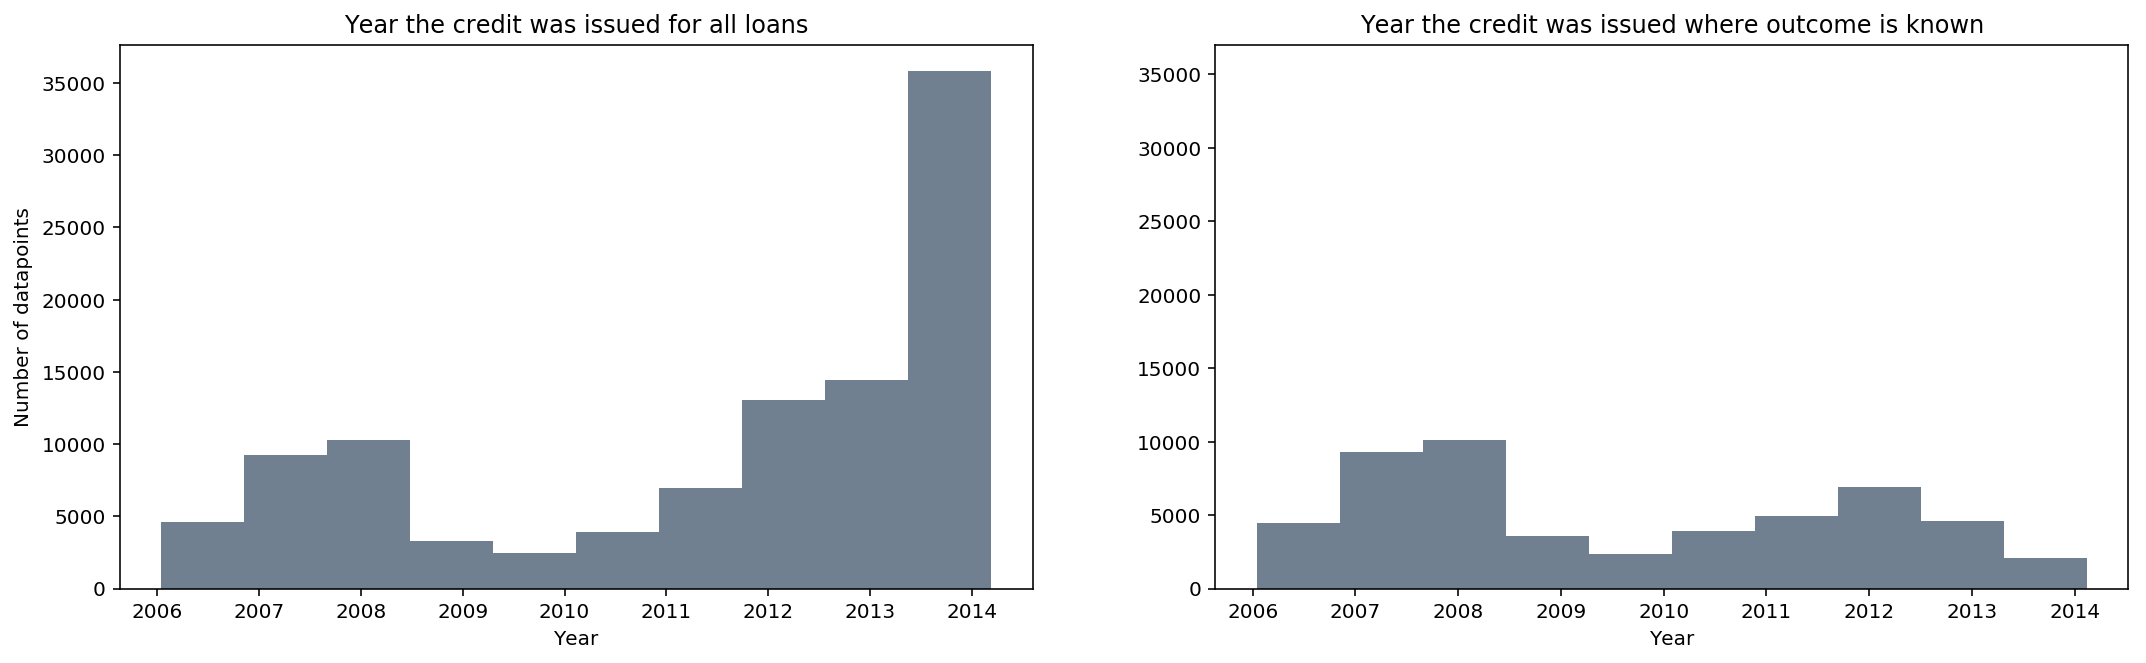

In [36]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 2, 1)
plt.hist(df.date, color = base_color)
plt.title('Year the credit was issued for all loans')
plt.xlabel('Year')
plt.ylabel('Number of datapoints');

plt.subplot(1, 2, 2)
plt.hist(df.date[df['status'] != 'Current'], color = base_color)
plt.title('Year the credit was issued where outcome is known')
plt.ylim(0, 37000)
plt.xlabel('Year');

The left graph depicts the year for all loans contained in the dataset, whereas the right graph only shows loans where the outcome is known (status is not current). Visible is that the dataset contains data for transactions from 2006 up to 2014. Most data were collected in the years 2013 and 2014. However, most of transactions cannot be considered in an investigation of outcomes as the outcome is not known for most loans in those years.

#### What is the distribution of the monthly income?

In [36]:
df.monthly_income.describe()

count    104148.000000
mean       5395.961814
std        3037.264382
min           0.000000
25%        3333.000000
50%        4675.000000
75%        6750.000000
max       19958.000000
Name: monthly_income, dtype: float64

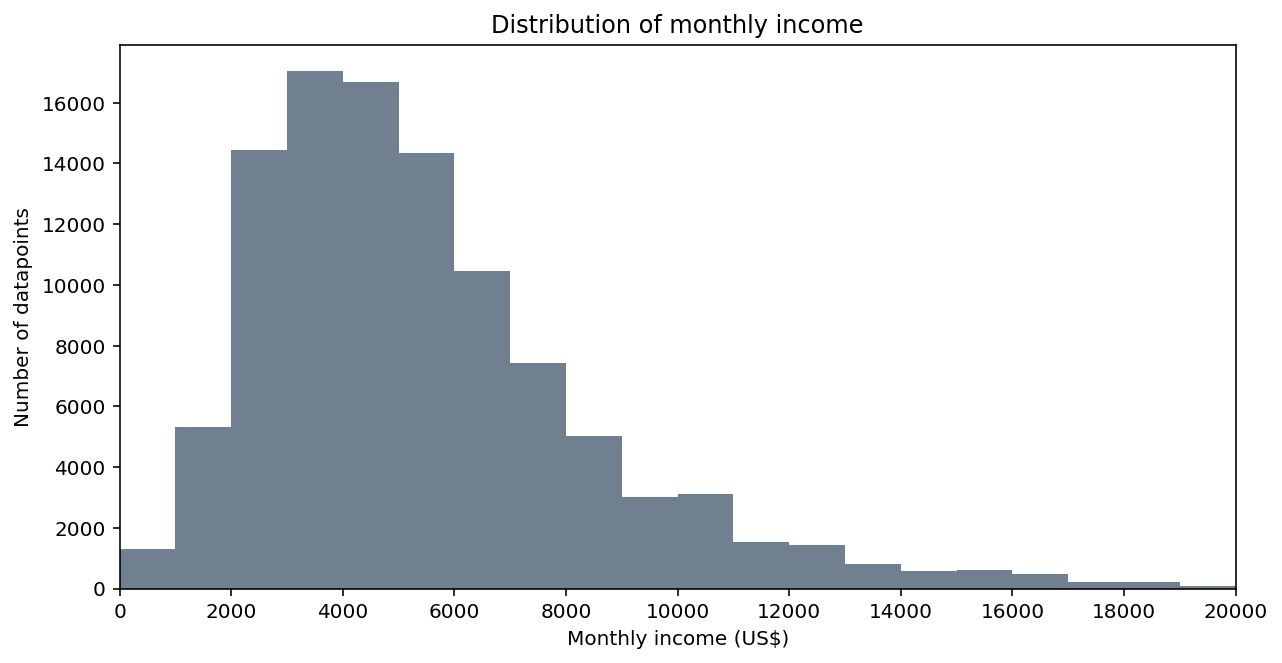

In [37]:
plt.figure(figsize = (10, 5))
plt.hist(df.monthly_income,
         bins = np.arange(0, 20500 + 1000, 1000),
         color = base_color)
plt.xticks(np.arange(0, 22000, 2000))
plt.xlim(0, 20001)
plt.title('Distribution of monthly income')
plt.xlabel('Monthly income (US$)')
plt.ylabel('Number of datapoints');

Most individuals obtain a monthly income between 2000 and 7000 US$.

#### What is the distribution of the loan amount?

In [38]:
df.loan_amount.describe()

count    104148.000000
mean       8359.257749
std        6253.976927
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: loan_amount, dtype: float64

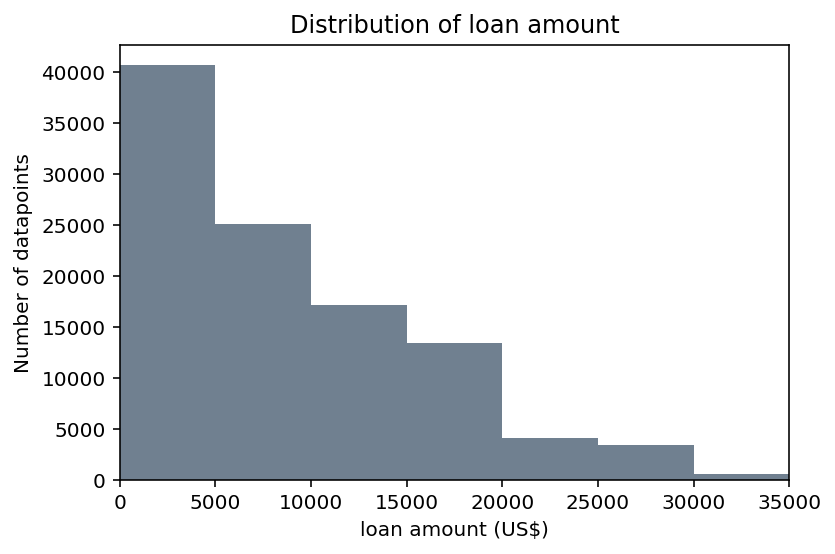

In [38]:
plt.hist(df.loan_amount,
         bins = np.arange(0, 35001, 5000),
         color = base_color)
plt.xlim(0, 35001)
plt.title('Distribution of loan amount')
plt.xlabel('loan amount (US$)')
plt.ylabel('Number of datapoints');

The plot of the loan amount is right skewed with most loans being less than 5,000$.

#### What are the propabilities for a loan to defaulted or be chargedoff?

In [39]:
# create an outcome_df which only contains loans where outcome is known
outcome_df = df[df['status'].isin(['Completed', 'Chargedoff', 'Defaulted'])]

In [40]:
# get values for relative probability scale of y axis
n = outcome_df.status.count()
n_max = outcome_df.status.value_counts().max()
p_max = n_max / n
ticks = np.arange(0, p_max + 0.1, 0.1)
labels = ['{:.1f}'.format(v) for v in ticks]
order = outcome_df.status.value_counts().index

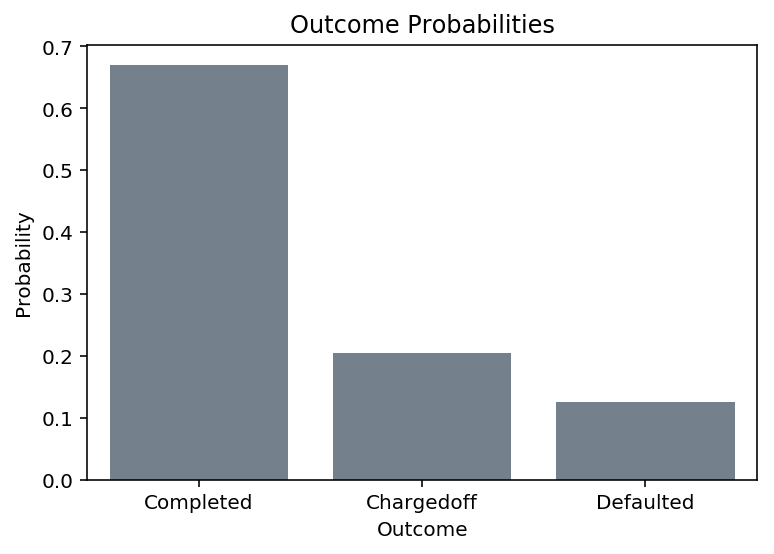

In [41]:
sns.countplot(outcome_df.status, color = base_color, order = order)
plt.yticks(ticks * n, labels)
plt.title('Outcome Probabilities')
plt.ylabel('Probability')
plt.xlabel('Outcome');

The probability of a loan to be payed back is a bit less than 70%. 20% of all loans get charged off and about 10% of all loans default. (Quick reminder: a loan is listed as defaulted if the borrower failed to make payments for an extended period of time. The status ``Defaulted`` changes to ``Chargedoff`` when there is no longer any reasonably expection for the loan to ever be payed back - the limit is set to 120 days defaulted in this case.)

#### Now I want to check on the reasons why most borrowers take on loans

In [42]:
# get values for y axis scale
n = df.reason.count()
n_max = df.reason.value_counts().max()
p_max = n_max / n
ticks = np.arange(0, p_max + 0.05, 0.05)
labels = ['{:.2f}'.format(v) for v in ticks]
order = df.reason.value_counts().index

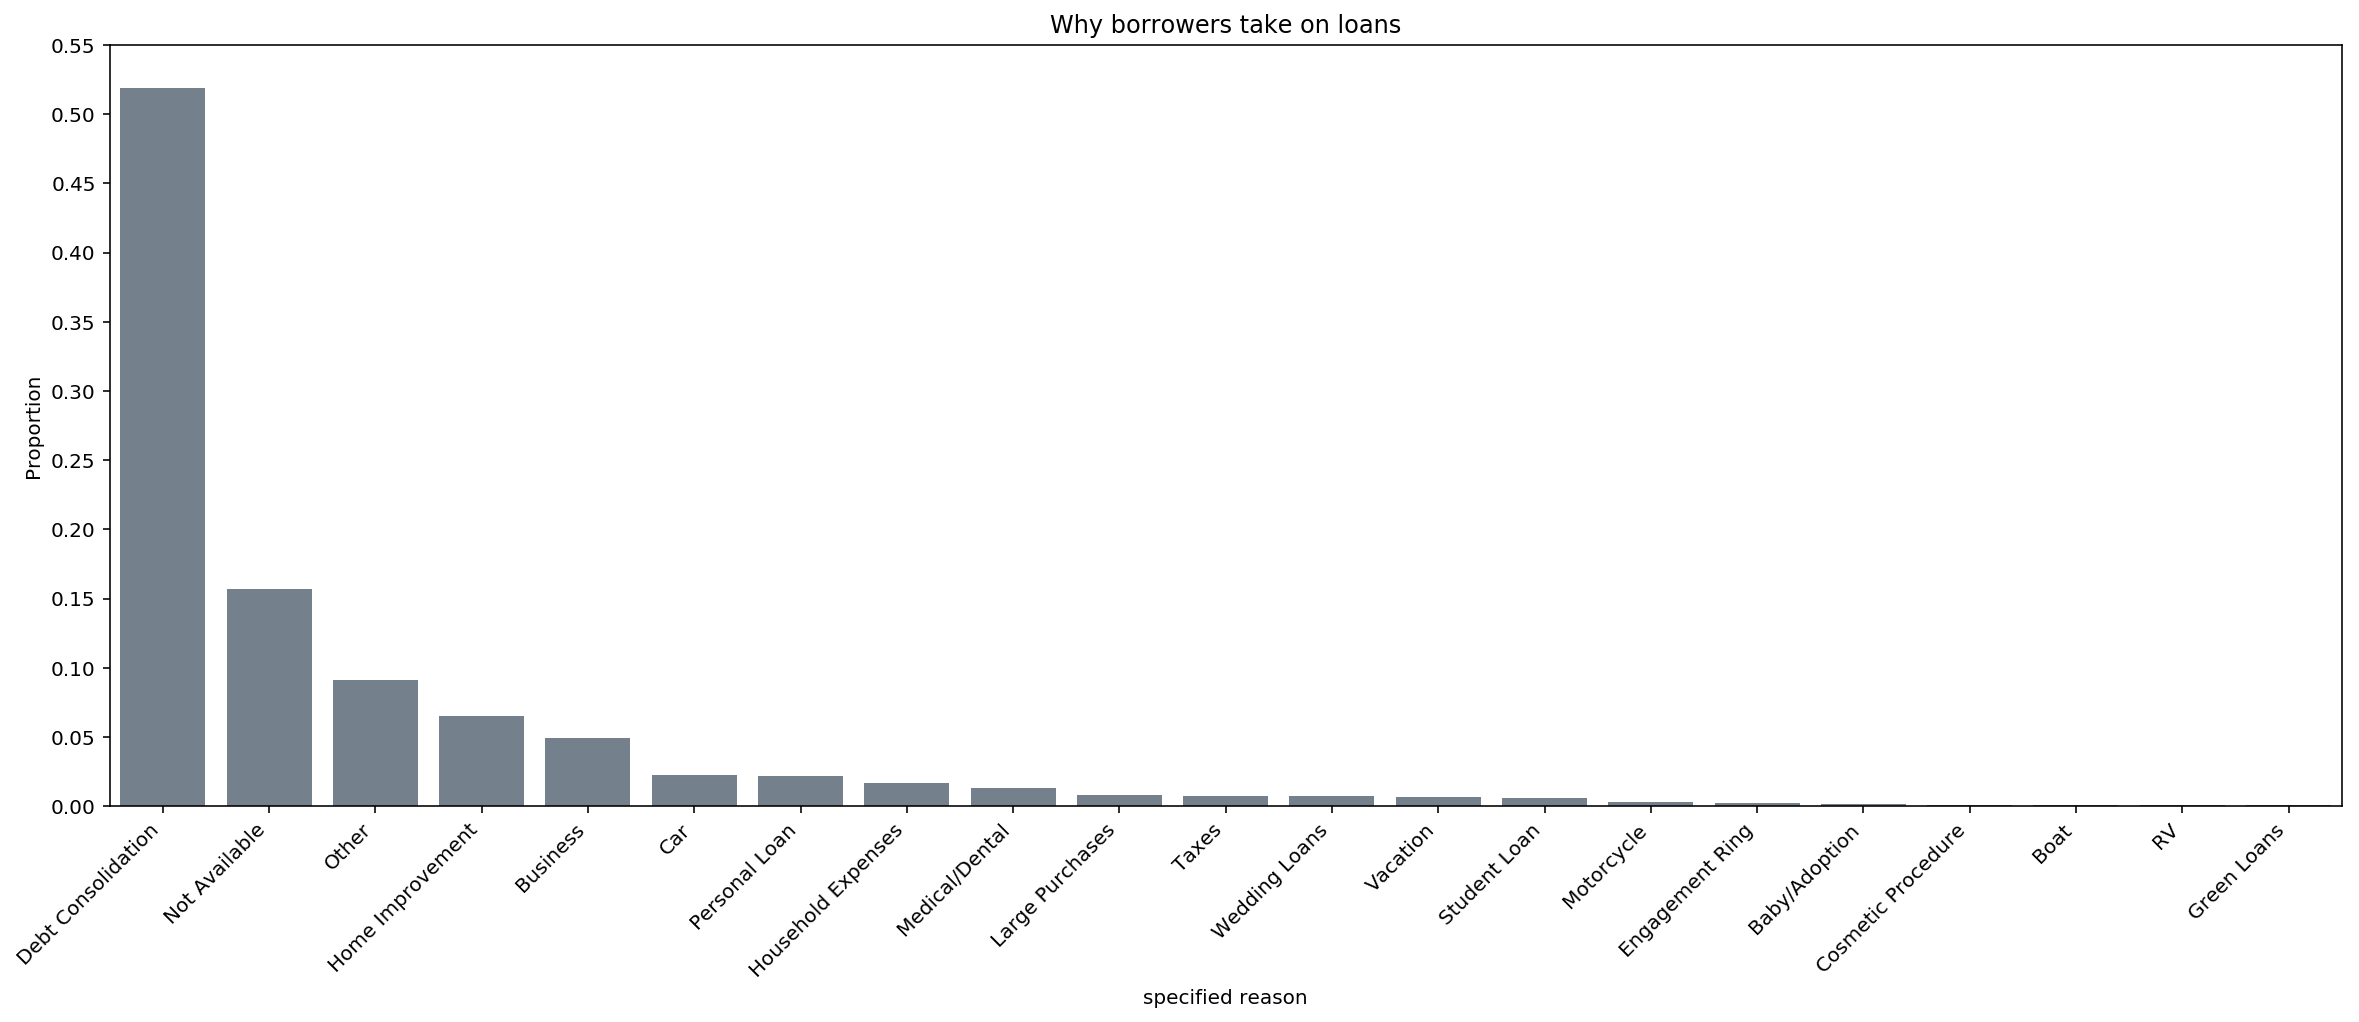

In [43]:
plt.figure(figsize = (20, 7))
sns.countplot(data = df, x = 'reason',
              order = order, color = base_color)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(ticks * n, labels)
plt.ylabel('Proportion')
plt.xlabel('specified reason')
plt.title('Why borrowers take on loans');

The by far most common reason to take a loan is to pay back other loans, followed by not specified, home improvement, business reasons and to finance a car. Which leads me to the next question: given that debt consolidation is the most common reason to take on a loan, have most borrowers already used a fair amount of their credit card limit?

#### Borrowers utiliziation of their credit card limit

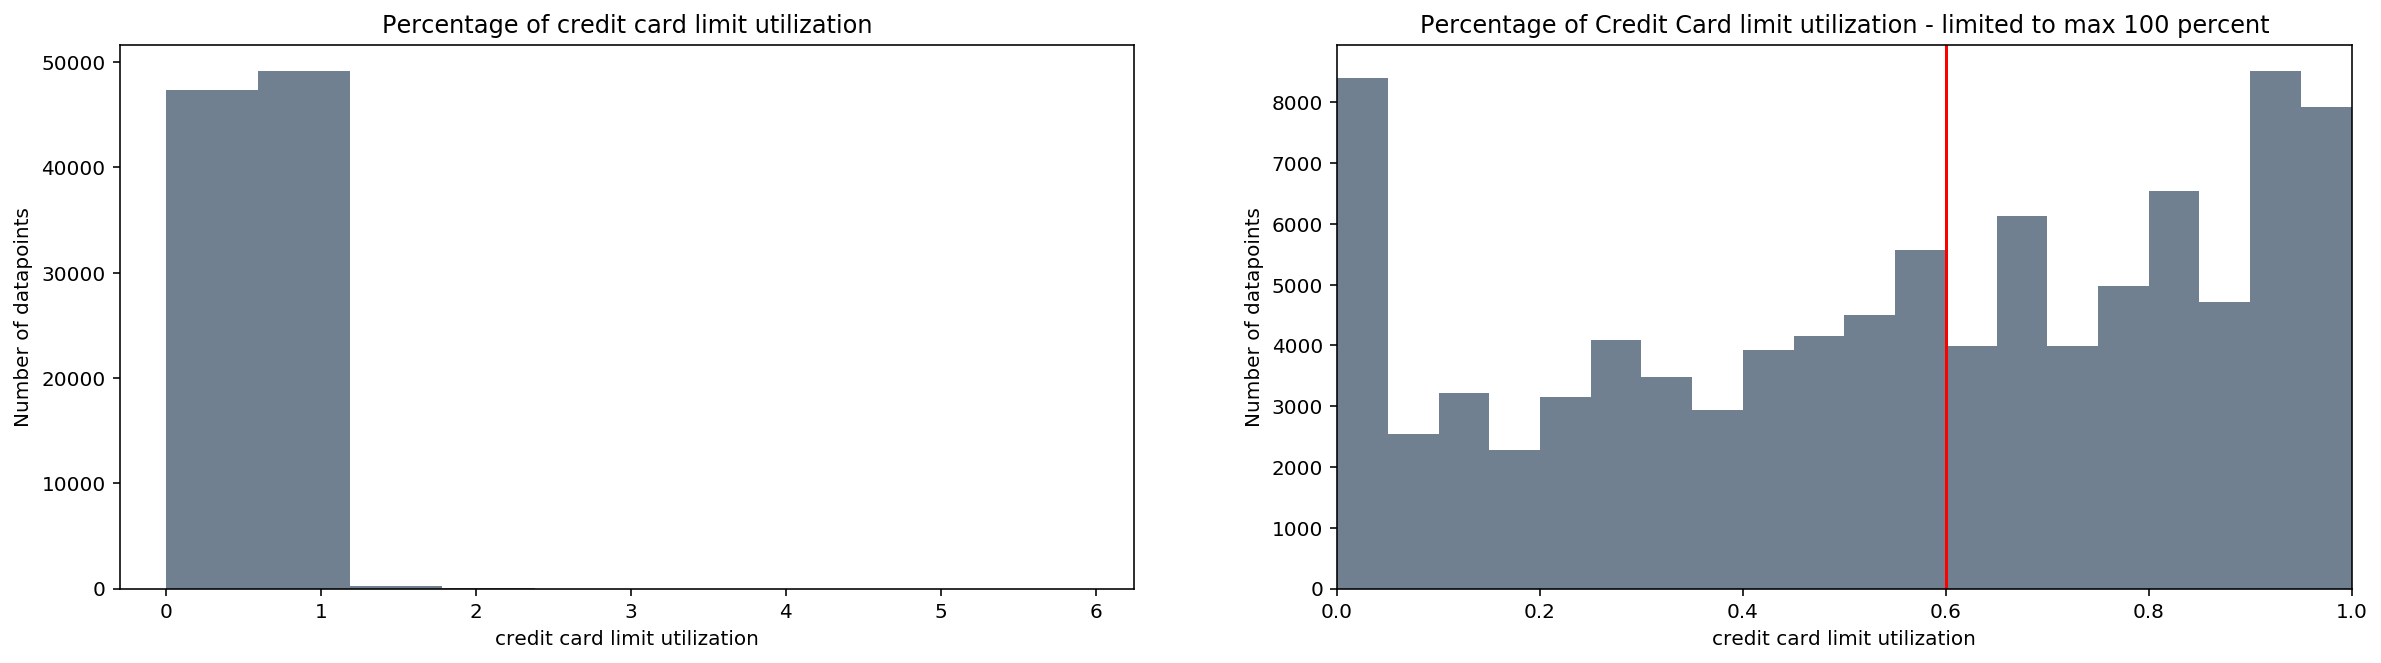

In [93]:
# exclude NaN values to allow for plotting
credit_df = df[(df['credit_utilization'].notnull())]

plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)               
plt.hist(credit_df.credit_utilization,
         color = base_color)
plt.title('Percentage of credit card limit utilization')
plt.xlabel('credit card limit utilization')
plt.ylabel('Number of datapoints');
               
plt.subplot(1, 2, 2)            
credit_df = df[(df['credit_utilization'].notnull()) & (df['credit_utilization'] < 1.01)]
plt.hist(credit_df.credit_utilization,
         bins = np.arange(0, 1.05, 0.05),
         color = base_color)
plt.xlim(0, 1)
plt.axvline(credit_df.credit_utilization.median(), color = 'r')
plt.title('Percentage of Credit Card limit utilization - limited to max 100 percent')
plt.xlabel('credit card limit utilization')
plt.ylabel('Number of datapoints');

The credit card limit utilization variable has some outliers (left graph) which distort the histogram. The right histogram therefore only plots the credit card utilization up to a point of 100 percent. The red line marks the median borrowers credit card limit utilization. Despite the decent amount of people who did not make use of any of their credit card debt, 50 percent of all borrowers have already used more than 60 percent of their credit card limit. 

#### What is the total debt-to-income ratio of borrowers?

In [50]:
df.debt_ratio.describe()

count    103979.000000
mean          0.260355
std           0.373324
min           0.000000
25%           0.150000
50%           0.220000
75%           0.320000
max          10.010000
Name: debt_ratio, dtype: float64

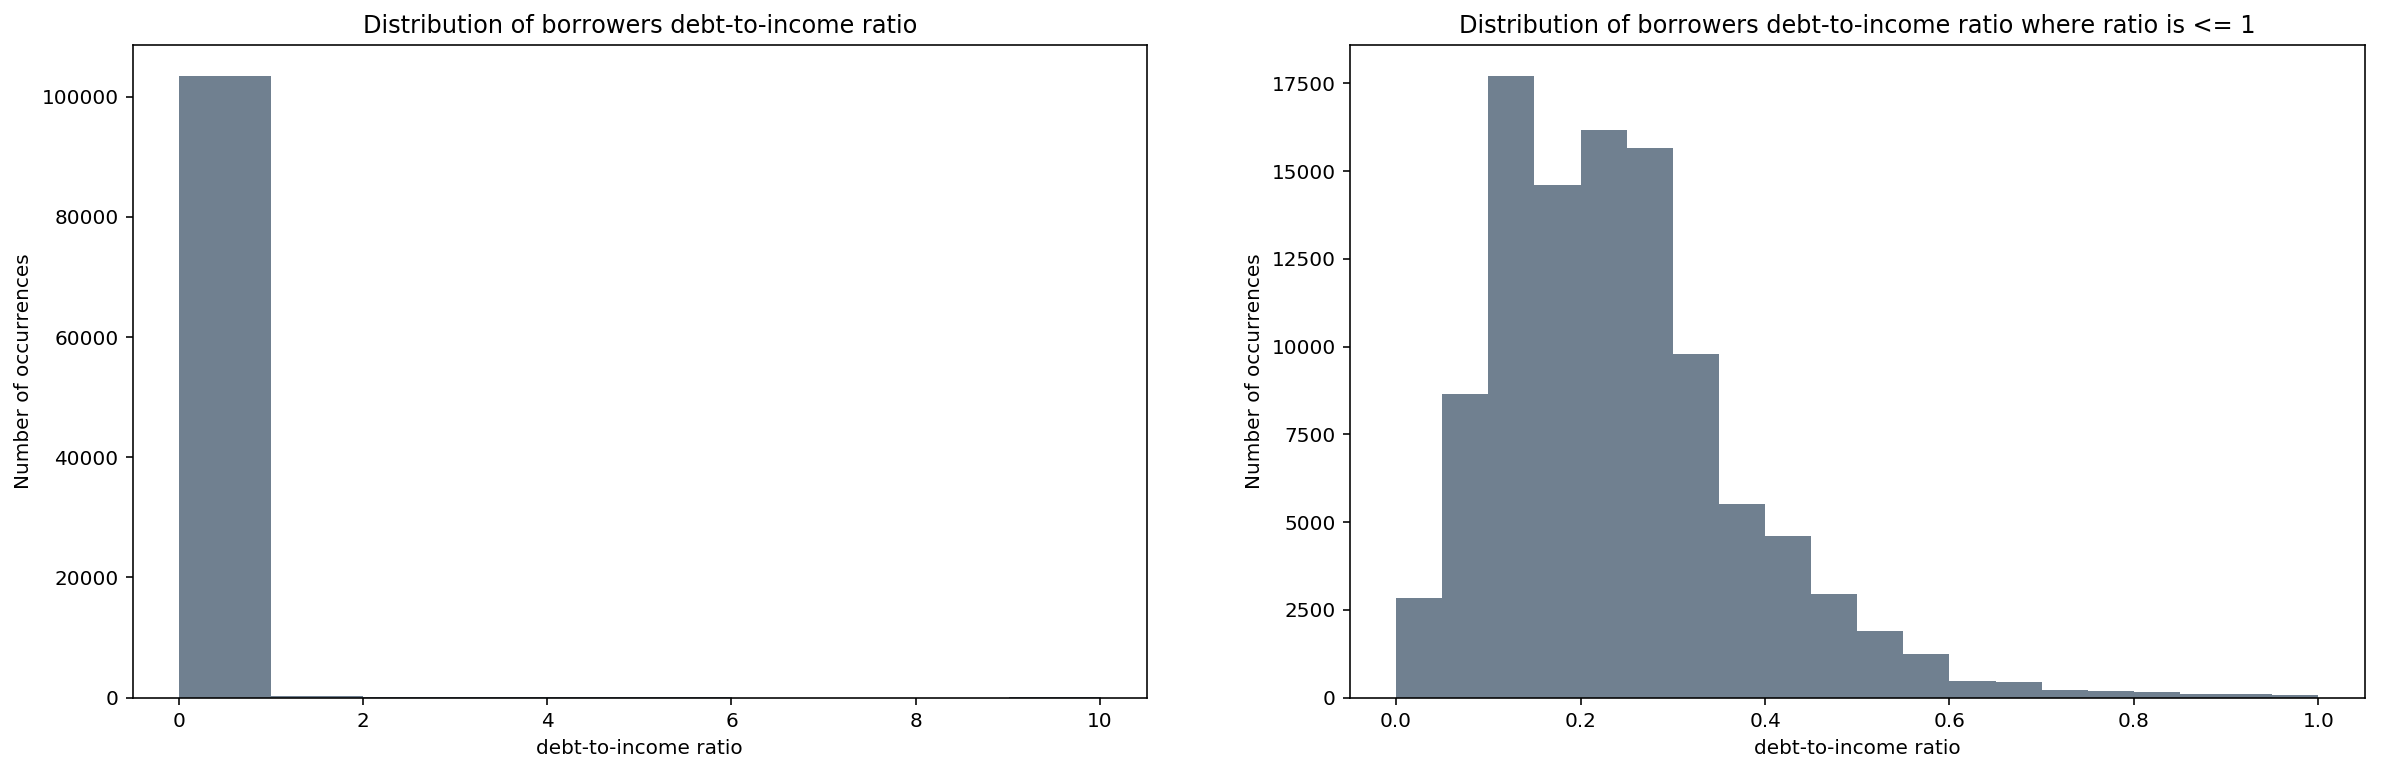

In [63]:
# exclude NaNs to allow plotting
debt = df[(df['debt_ratio'].notnull())]

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.hist(debt.debt_ratio, color = base_color)
plt.title('Distribution of borrowers debt-to-income ratio')
plt.xlabel('debt-to-income ratio')
plt.ylabel('Number of occurrences');

plt.subplot(1, 2, 2)
debt = debt[debt['debt_ratio'] <= 1]
bins = np.arange(0, 1.01, 0.05)
plt.hist(debt.debt_ratio, bins = bins, color = base_color)
plt.title('Distribution of borrowers debt-to-income ratio where ratio is <= 1')
plt.xlabel('debt-to-income ratio')
plt.ylabel('Number of occurrences');

Most borrowers already have a debt to income ratio between 10 and 30 percent. There are a few outliers with a debt-to-income ratio of up to 10 which distorted the left graph. The right graph therefore only depicts a debt-to-income range from 0 to 1 (0 to 100 percent).

### Bivariate Exploration

I'd like to start by plotting a plot matrix to check the pairwise correlation between different variables

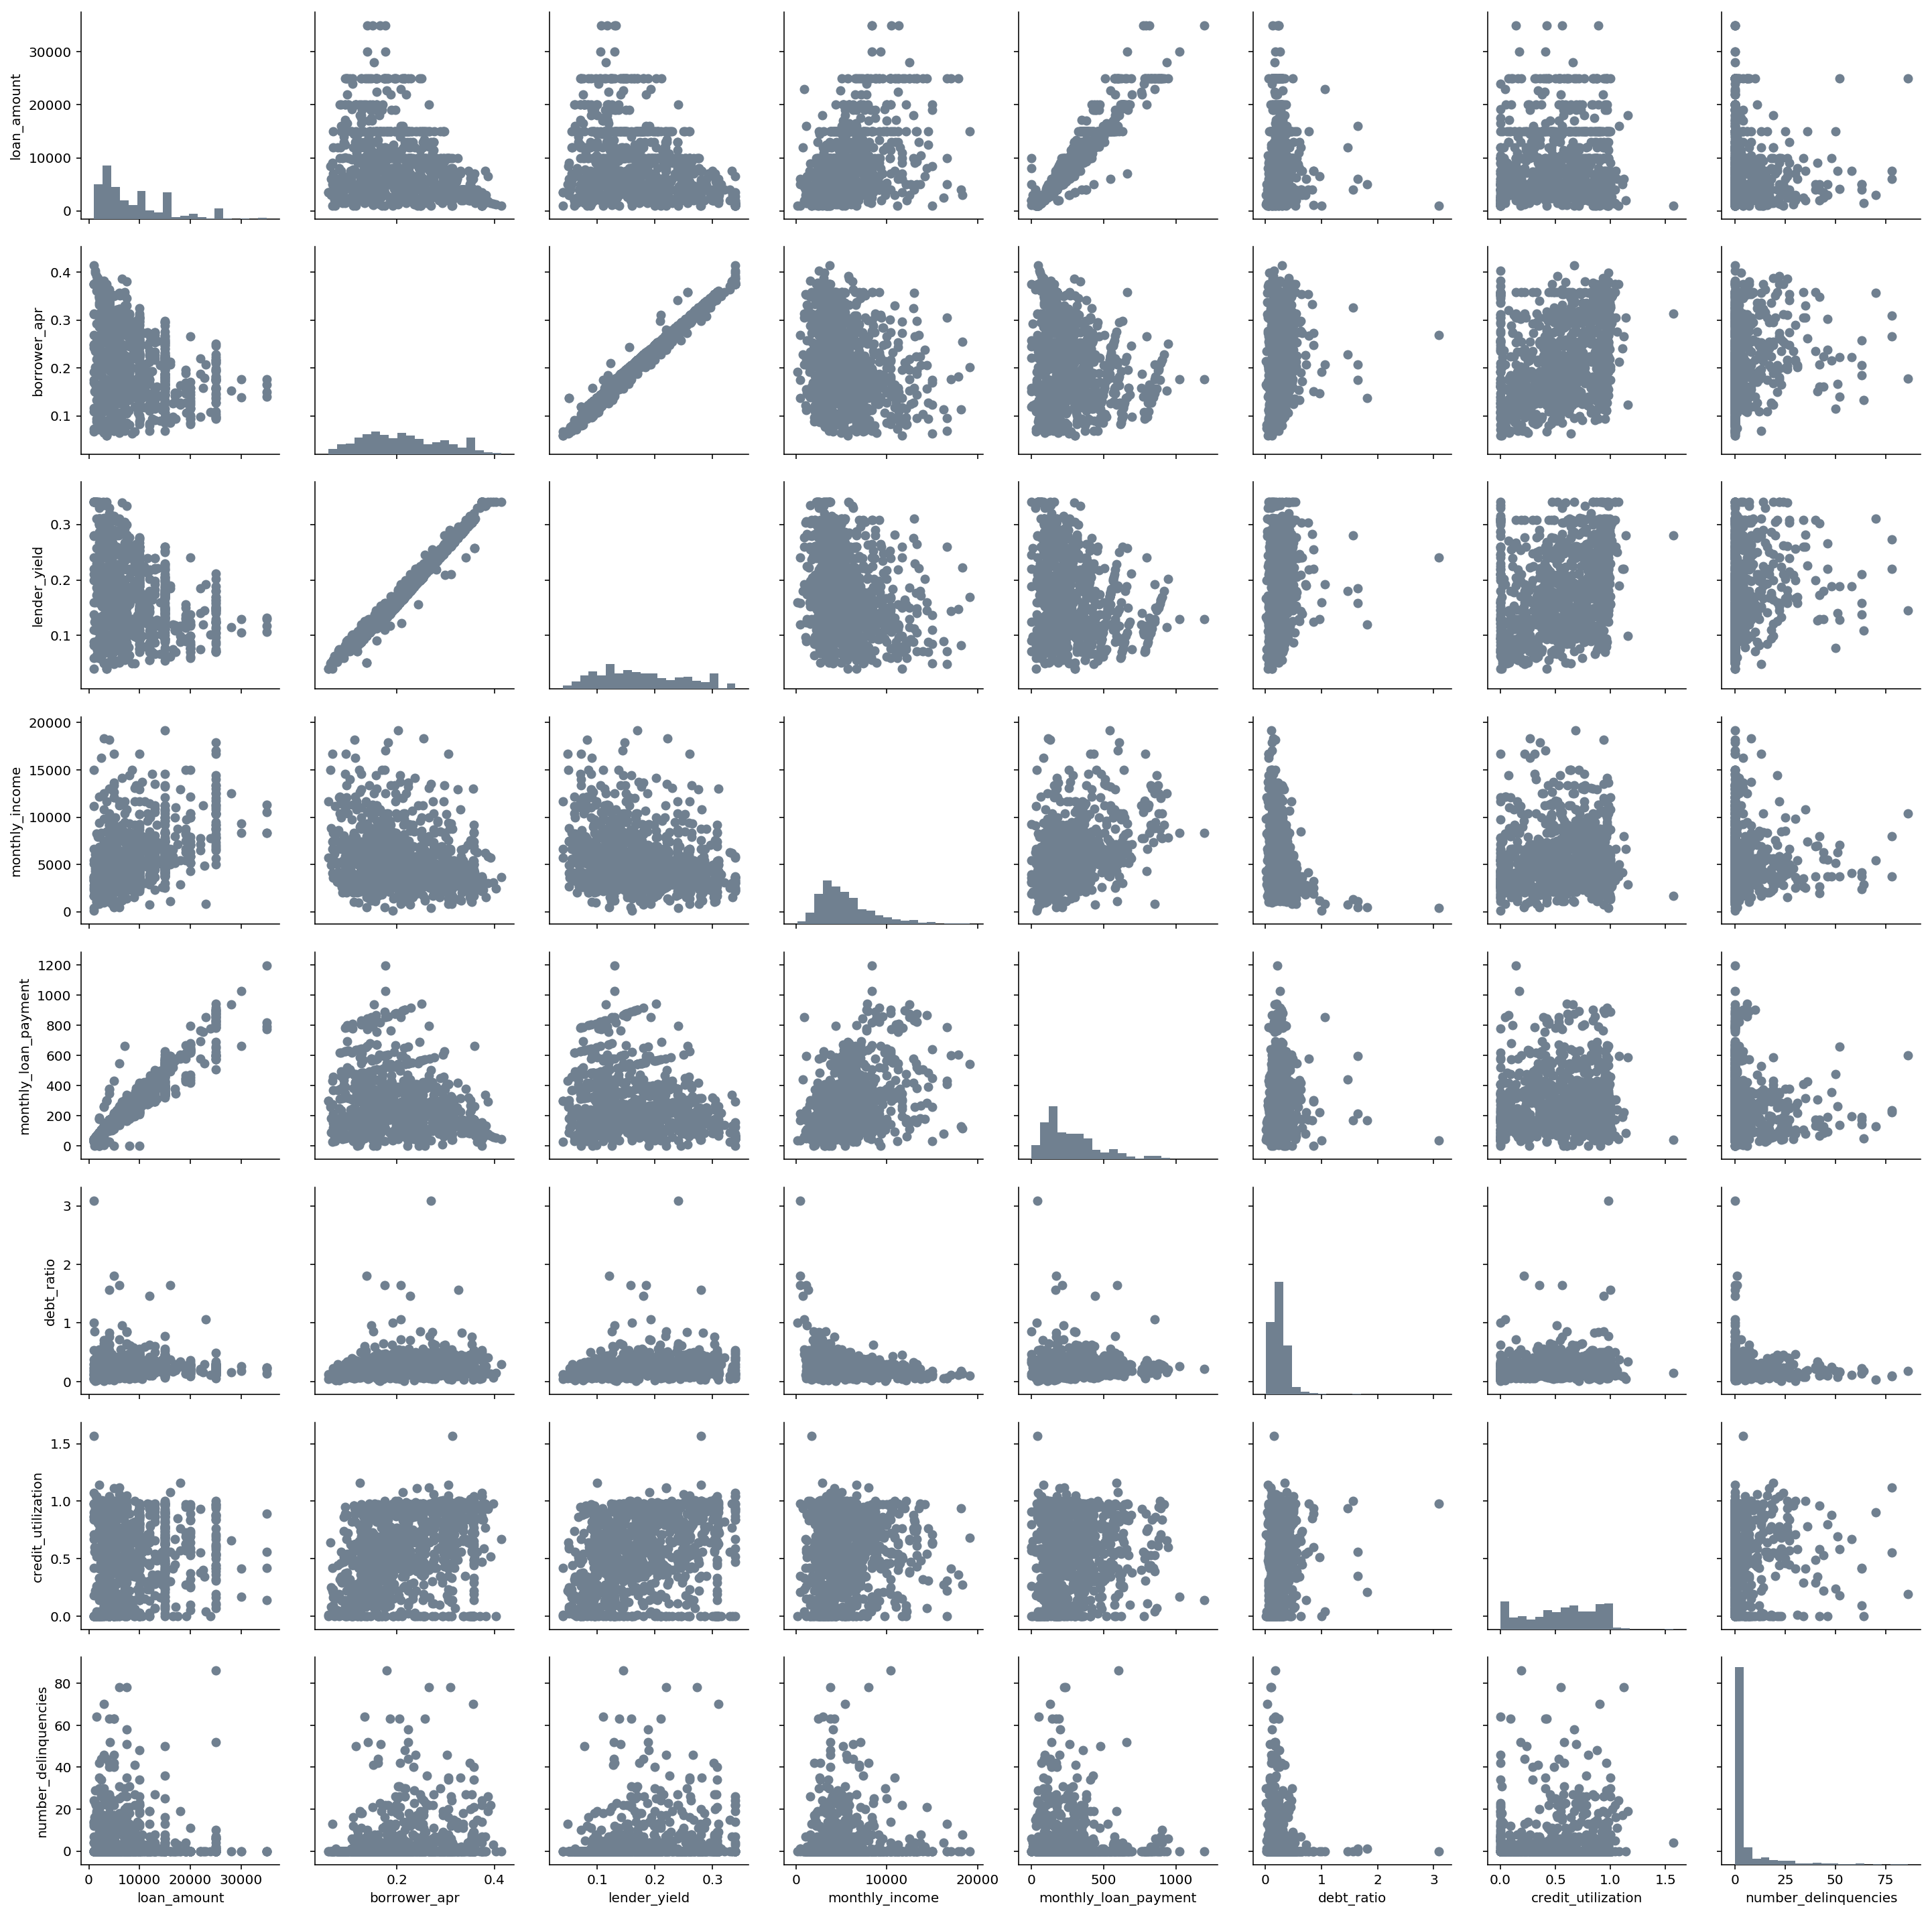

In [101]:
# plot matrix: sample 1000 loans for graphs to look cleaner and render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
loan_samp = df.loc[samples,:]
# exclude NaNs to allow for plotting
loan_samp = loan_samp[(loan_samp['debt_ratio'].notnull()) &
                      (loan_samp['credit_utilization'].notnull())]

numeric_vars = ['loan_amount', 'borrower_apr',
                'lender_yield', 'monthly_income',
                'monthly_loan_payment', 'debt_ratio',
                'credit_utilization', 'number_delinquencies']

g = sns.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20, color = base_color);
g.map_offdiag(plt.scatter, color = base_color);

Some noteworthy observations include an increase in the lenders yield as the borrowers apr increases and an increase in the monthly loan payment with the loan amount increasing. However, those correlations are already more or less obvious by common sense. Correlations among the other numerical variables are not so obvious since I can't recognize any clear patterns there.

#### Next up I want to take a closer look at the relationship between the lenders yield and the borrowers apr

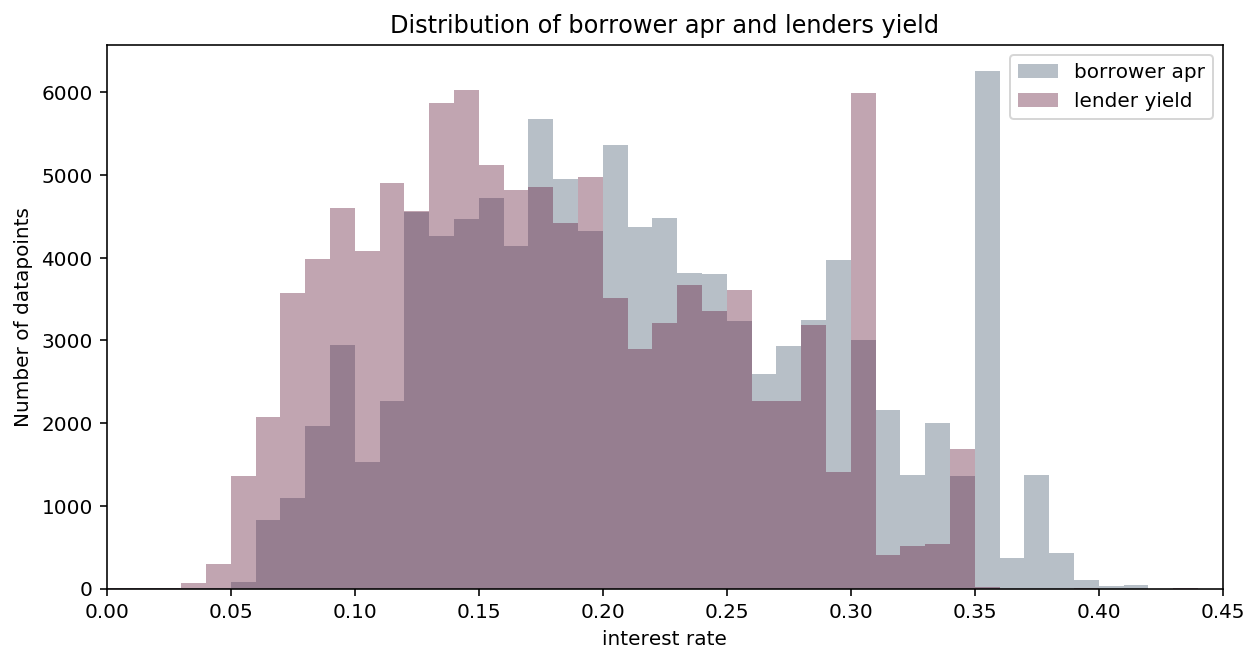

In [64]:
plt.figure(figsize = (10, 5))
plt.hist(df.borrower_apr, bins = np.arange(0, 0.5, 0.01),
         color = '#708090', alpha = 0.5)
plt.hist(df.lender_yield, bins = np.arange(0, 0.5, 0.01),
         color = '#651e3e', alpha = 0.4)
plt.legend(['borrower apr', 'lender yield'])
plt.xlim(0, 0.45)
plt.title('Distribution of borrower apr and lenders yield')
plt.xlabel('interest rate')
plt.ylabel('Number of datapoints');

The distribution of the lenders yield is basically a left skewed borrowers apr curve. This makes sense with the difference between both variables being prospers share in the deal. Interestingly, theres a major elevation at the 0.35 mark for the borrower apr and the 0.30 mark for the lender yield.

**Now I'll continue to compare the mean borrower apr and lender return for different credit ratings**

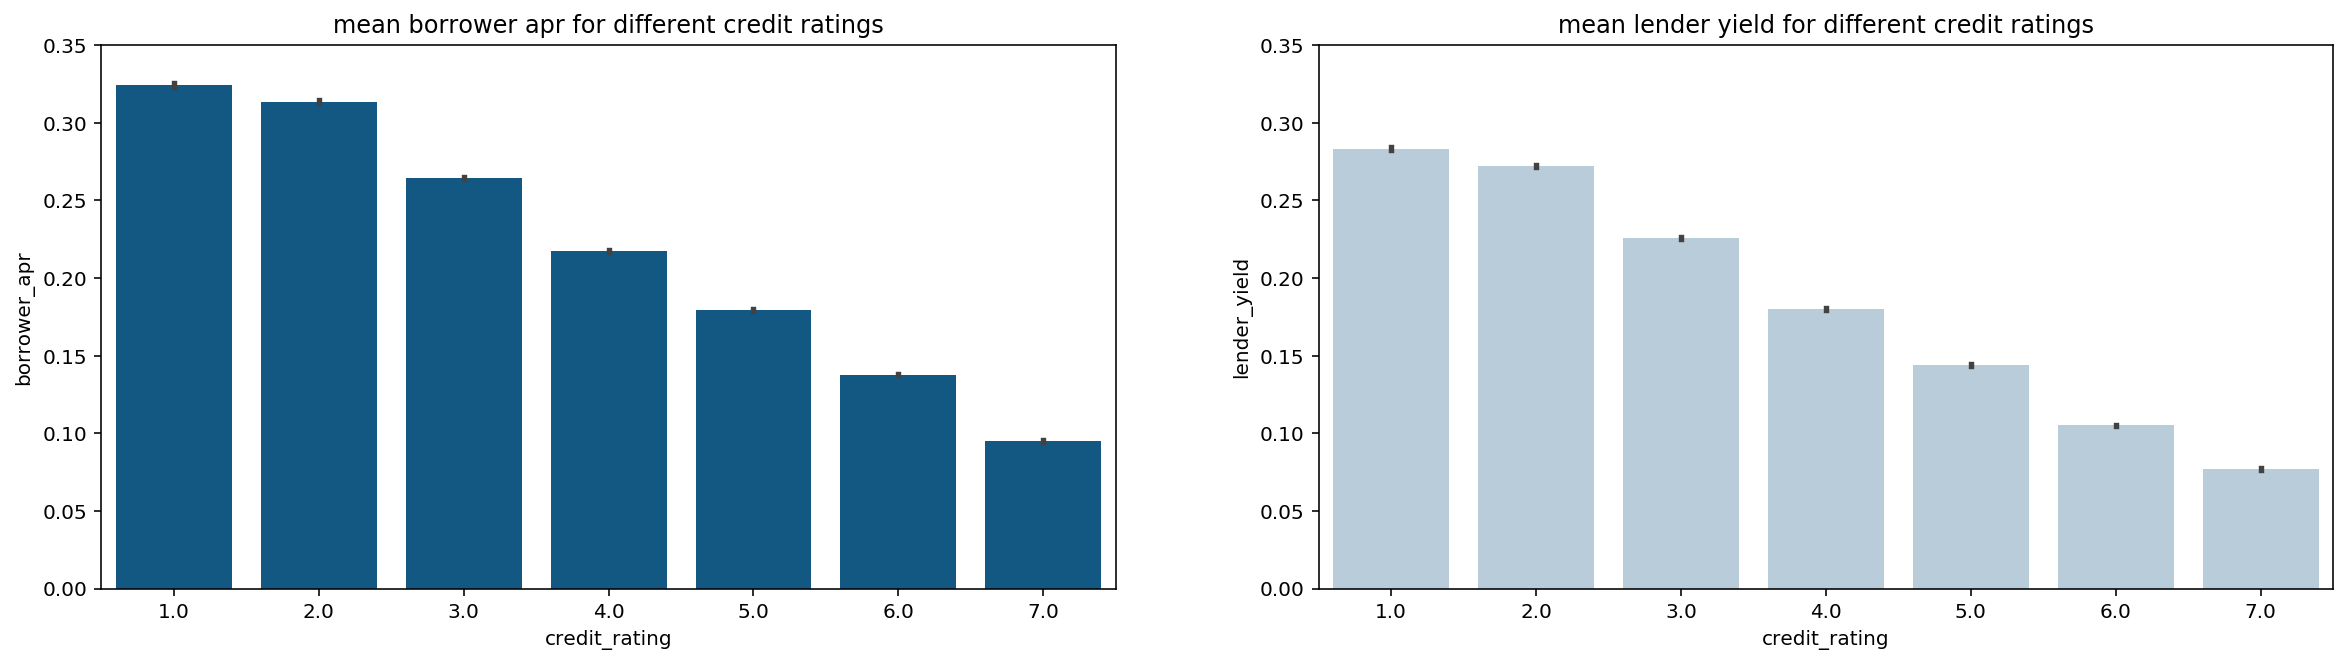

In [65]:
data = df[df['credit_rating'] != 0] # exclude credit rating of 0 (NaN)

plt.figure(figsize = (20, 5))

plt.subplot(1, 2, 1)
sns.barplot(data = data, x = 'credit_rating', y = 'borrower_apr',
            color = '#005b96')
plt.ylim([0, 0.35])
plt.title('mean borrower apr for different credit ratings')

plt.subplot(1, 2, 2)
sns.barplot(data = data, x = 'credit_rating', y = 'lender_yield',
            color = '#b3cde0')
plt.ylim([0, 0.35])
plt.title('mean lender yield for different credit ratings');

The mean borrower rate decreases with a better credit rating. The same goes for the lender yield. The level of uncertainty is very low indicated by the small black bar.

#### What about the mean loan amount?

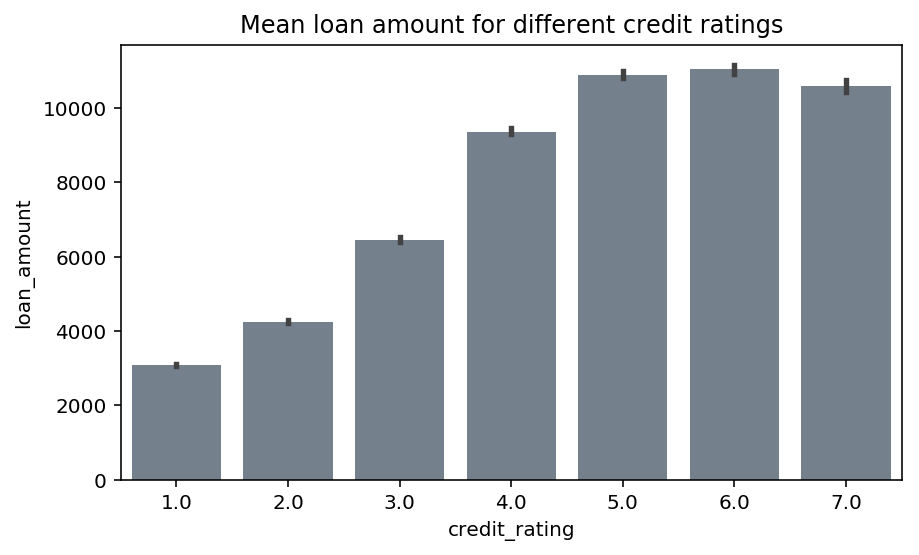

In [66]:
plt.figure(figsize = (7, 4))
sns.barplot(data = data, x = 'credit_rating', y = 'loan_amount',
            color = base_color)
plt.title('Mean loan amount for different credit ratings');

Interesting. Individuals with a lower credit rating tend to on average take lower loans. This effect however stops at a credit rating of 6 where the average loan amount does not increase any further.

#### What are the interest rate differences for different outcomes?

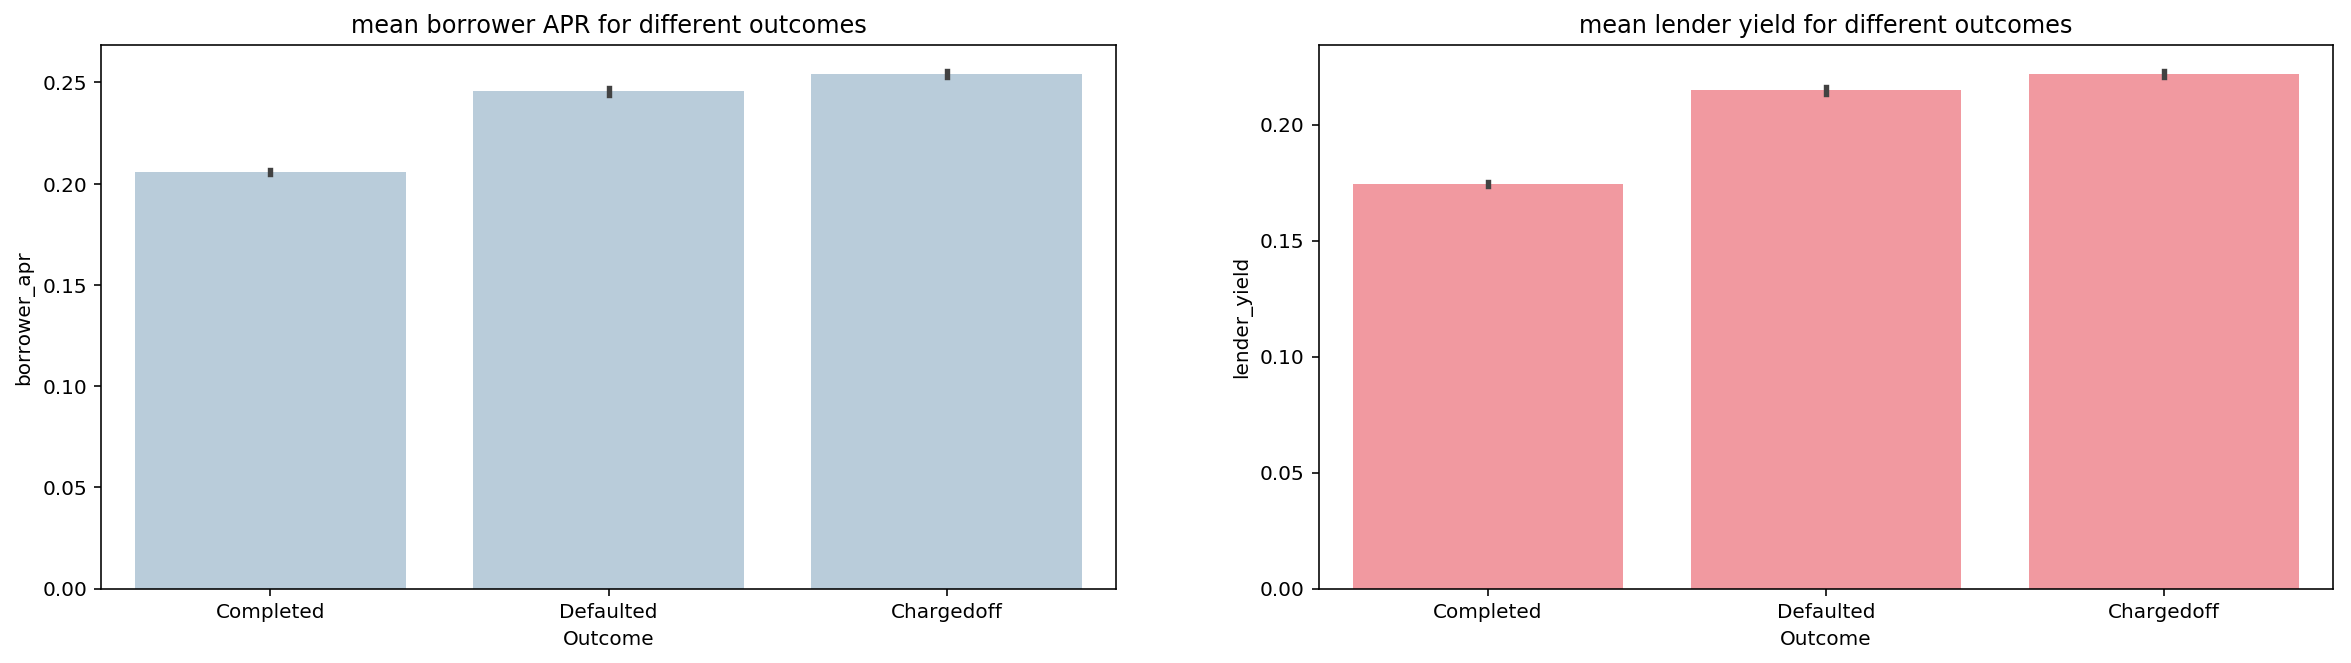

In [67]:
plt.figure(figsize = (20, 5))

plt.subplot(1, 2, 1)
sns.barplot(data = outcome_df, x = 'status', y = 'borrower_apr',
            color = '#b3cde0')
plt.title('mean borrower APR for different outcomes')
plt.xlabel('Outcome');

plt.subplot(1, 2, 2)
sns.barplot(data = outcome_df, x = 'status', y = 'lender_yield',
            color = '#ff8b94')
plt.title('mean lender yield for different outcomes')
plt.xlabel('Outcome');

In [68]:
outcome_df.groupby('status')['borrower_apr'].median()

status
Chargedoff    0.25517
Completed     0.19088
Defaulted     0.24753
Name: borrower_apr, dtype: float64

In [69]:
outcome_df.groupby('status')['lender_yield'].median()

status
Chargedoff    0.2250
Completed     0.1600
Defaulted     0.2184
Name: lender_yield, dtype: float64

Completed Loans had on average a lower interest rate for both, borrowers and lenders. Defaulted and Chargedoff loans are associated with an on average higher interest rate. The median borrower apr of a chargedoff loan is 25.5 percent. The median borrower apr of a completed loan is 19.1 percent.

#### How do the outcome probabilities compare for different credit ratings?

In [70]:
# Query the outcome df to only include the columns status and credit_rating
query = outcome_df[['status', 'credit_rating']]
# Exclude credit rating 0 (equivalent to NaN)
query = query[query['credit_rating'] != 0]
# groupby credit rating and status to get get a df with the count for each status
groupby_credit_rating = query.groupby(['credit_rating', 'status']).size().reset_index()
groupby_credit_rating.head()

,credit_rating,status,0
0,1.0,Chargedoff,2154
1,1.0,Completed,3202
2,1.0,Defaulted,1302
3,2.0,Chargedoff,1841
4,2.0,Completed,3736


In [71]:
# create lists which contain the values for each category for each rating 
completed = list(groupby_credit_rating.query('"Completed" in status')[0])
defaulted = list(groupby_credit_rating.query('"Defaulted" in status')[0])
chargedoff = list(groupby_credit_rating.query('"Chargedoff" in status')[0])

In [72]:
# construct a new df used for the stacked bar graph
raw_data = {'Completed': completed, 'Defaulted': defaulted, 'Chargedoff': chargedoff}
outcome_stacked = pd.DataFrame(raw_data)

In [73]:
# convert the values from absolute to percentage
totals = [i + j + k for i, j, k in zip(outcome_stacked['Completed'], outcome_stacked['Defaulted'],\
                                       outcome_stacked['Chargedoff'])]
Completed = [i / j * 100 for i, j in zip(outcome_stacked['Completed'], totals)]
Defaulted = [i / j * 100 for i, j in zip(outcome_stacked['Defaulted'], totals)]
Chargedoff = [i / j * 100 for i, j in zip(outcome_stacked['Chargedoff'], totals)]

r = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

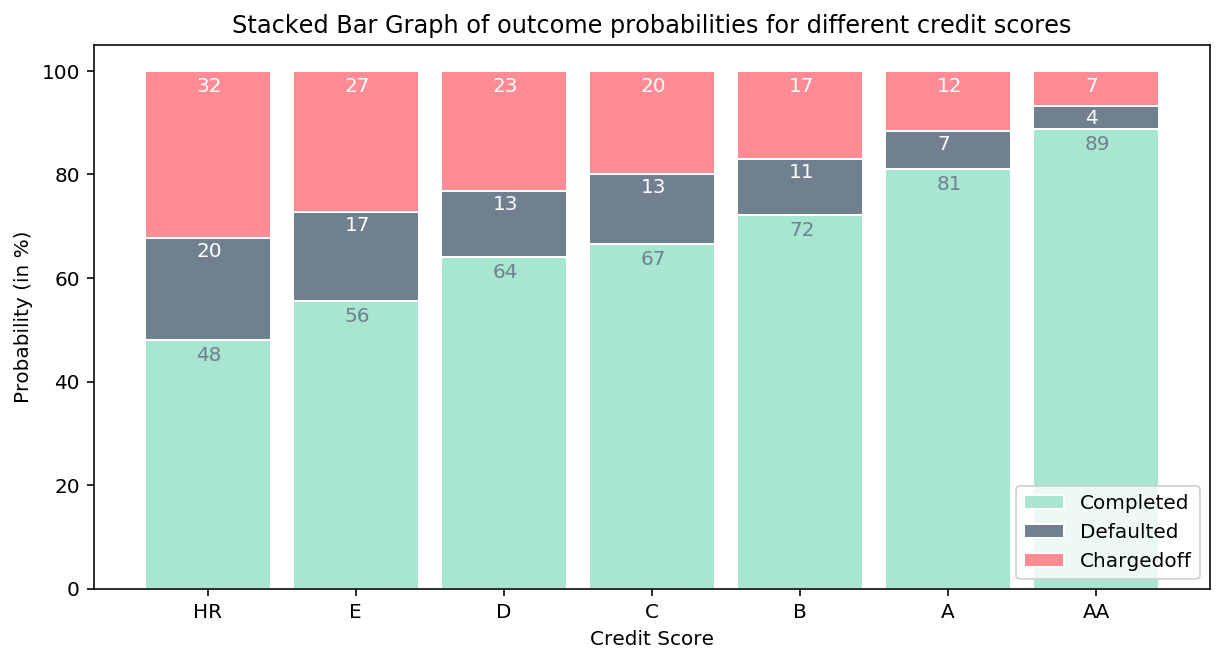

In [75]:
# plot the stacked bar graph
width = 0.85

plt.figure(figsize = (10, 5))

plt.bar(r, Completed, color = '#a8e6cf', edgecolor = 'white', width = width, label = 'Completed')
plt.bar(r, Defaulted, bottom = Completed, color = base_color, edgecolor = 'white', width = width, label = 'Defaulted')
plt.bar(r, Chargedoff, bottom = [i + j for i, j in zip(Completed, Defaulted)], color = '#ff8b94',\
        edgecolor = 'white', width = width, label = 'Chargedoff')

plt.title('Stacked Bar Graph of outcome probabilities for different credit scores')
plt.legend(loc = 'lower right')
plt.xlabel('Credit Score')
plt.ylabel('Probability (in %)');

# plot value labels
xlocs = np.arange(0, 7)
outcomes_list = [Completed, Defaulted, Chargedoff]
labels2 = [str(round(v)) for v in Defaulted]
labels3 = [str(round(v)) for v in Chargedoff]
for i, v in enumerate(Completed):
    plt.text(xlocs[i] - 0.075, v - 4, str(round(v)), color = base_color)
    
for i, v in enumerate([x + y for x, y in zip(Completed, Defaulted)]):
    plt.text(xlocs[i] - 0.075, v - 3.5, labels2[i], color = 'white')
    
for i, v in enumerate([Completed[i] + Defaulted[i] + Chargedoff[i] for i in range(len(Completed))]):
    plt.text(xlocs[i] - 0.075, v - 4, labels3[i], color = 'white');

My favorite plot of this project. It depicts the outcome probability of a loan depending given different credit scores. If a borrower received a credit score of HR (high risk), then the probability of the loan to be completed is only 48 percent. On the other hand, a credit score of AA is associated with a payback rate of 89 percent.

Resource: [Stacked Bar Graph](https://python-graph-gallery.com/13-percent-stacked-barplot/)

#### For loans which default or get charged off, what were the reasons specified by the borrower? (absolute amount)

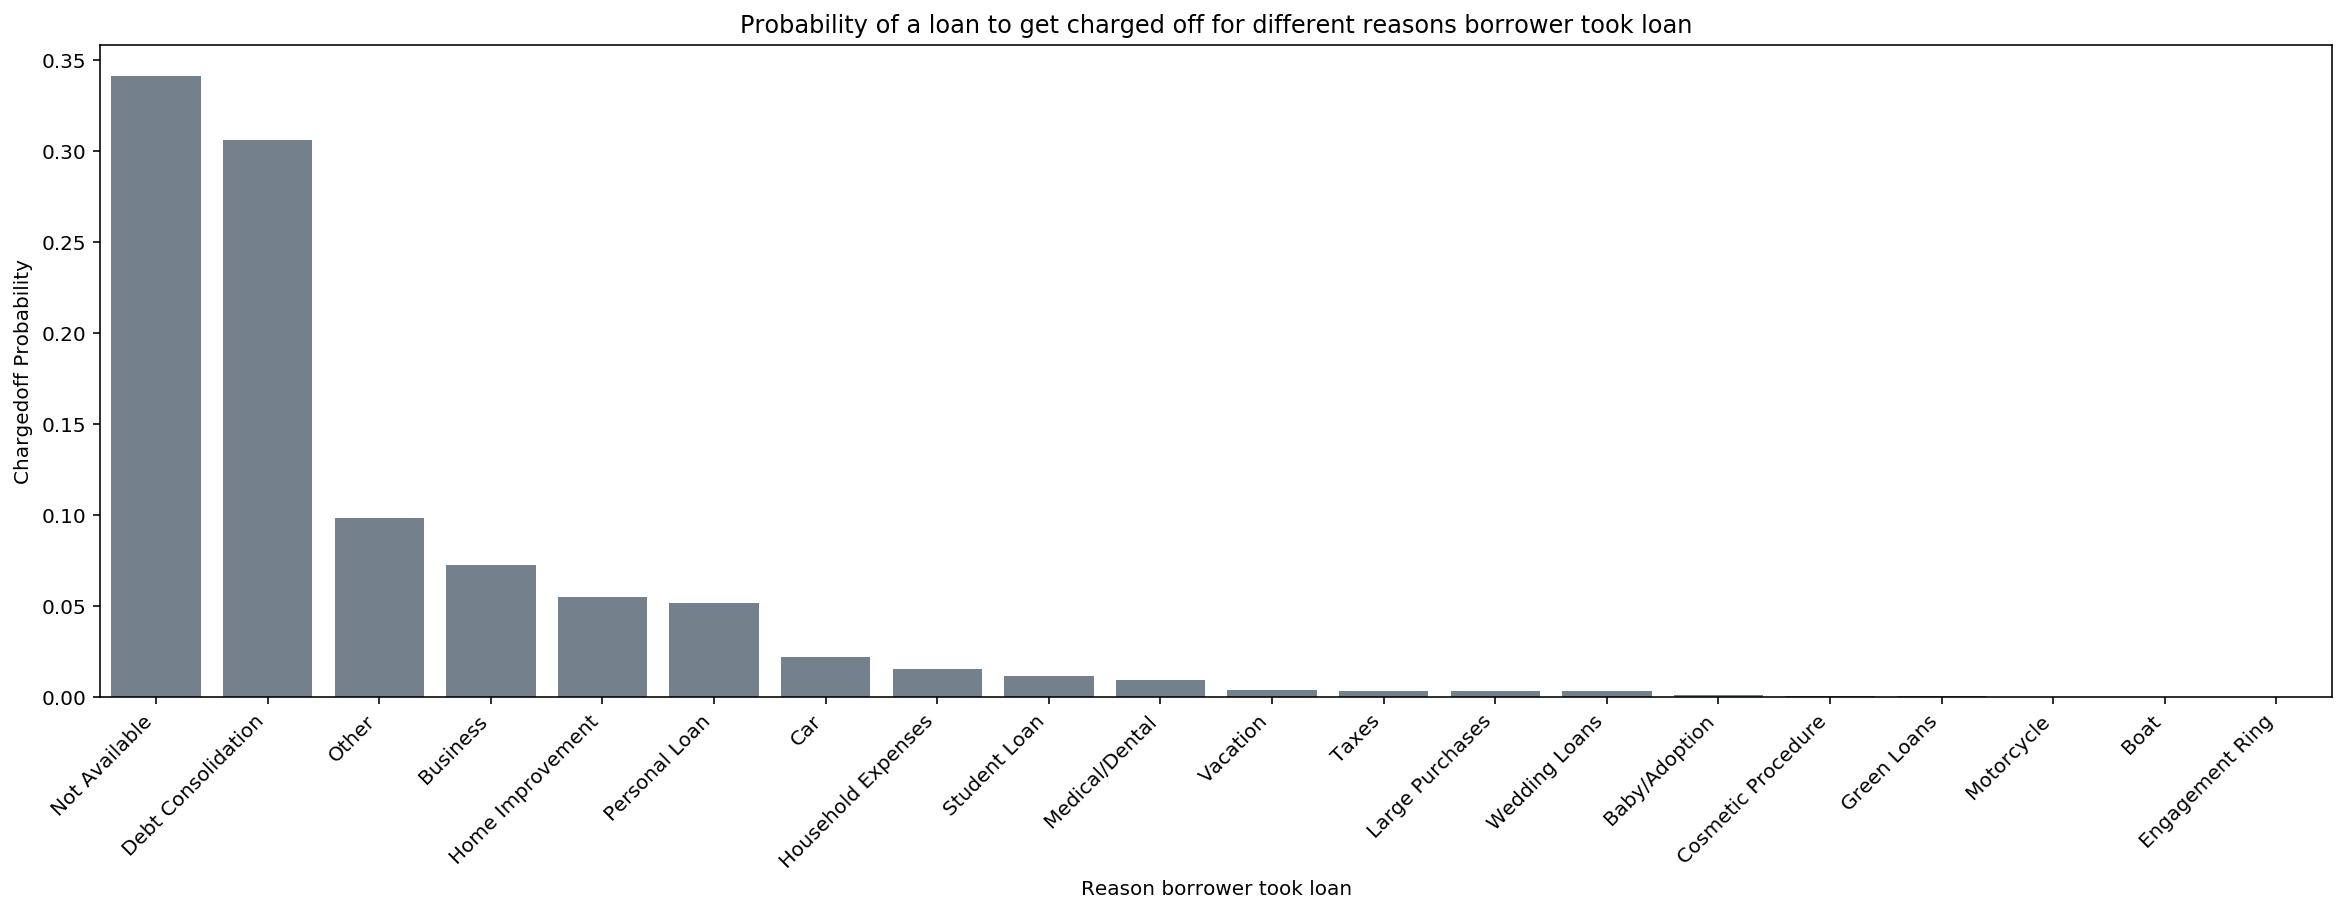

In [78]:
chargedoff = outcome_df[outcome_df['status'] == 'Chargedoff']
chargedoff = chargedoff.groupby('reason')['status'].count().reset_index().sort_values('status', ascending = False)

n = chargedoff.status.sum()
n_max = chargedoff.status.head(1)
p_max = n_max / n
ticks = np.arange(0, p_max + 0.05, 0.05)
labels = ['{:.2f}'.format(v) for v in ticks]

plt.figure(figsize = (20, 6))
sns.barplot(chargedoff.reason, chargedoff.status,
            color = base_color)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(ticks * n, labels)
plt.title('Probability of a loan to get charged off for different reasons borrower took loan')
plt.ylabel('Chargedoff Probability')
plt.xlabel('Reason borrower took loan');

Regarding the absolute count, most defaulted or chargedoff loans were either of reason debt consolidation or not available. However, as was shown before, debt consolidation and not available were also the in total most common reasons why borrowers took loans. Therefore I'll now adjust the chargedoff rate by dividing each value by the respective total count for each reason.

#### Probability of a loan to default for different reasons borrower took loan (amount relative to reason total)

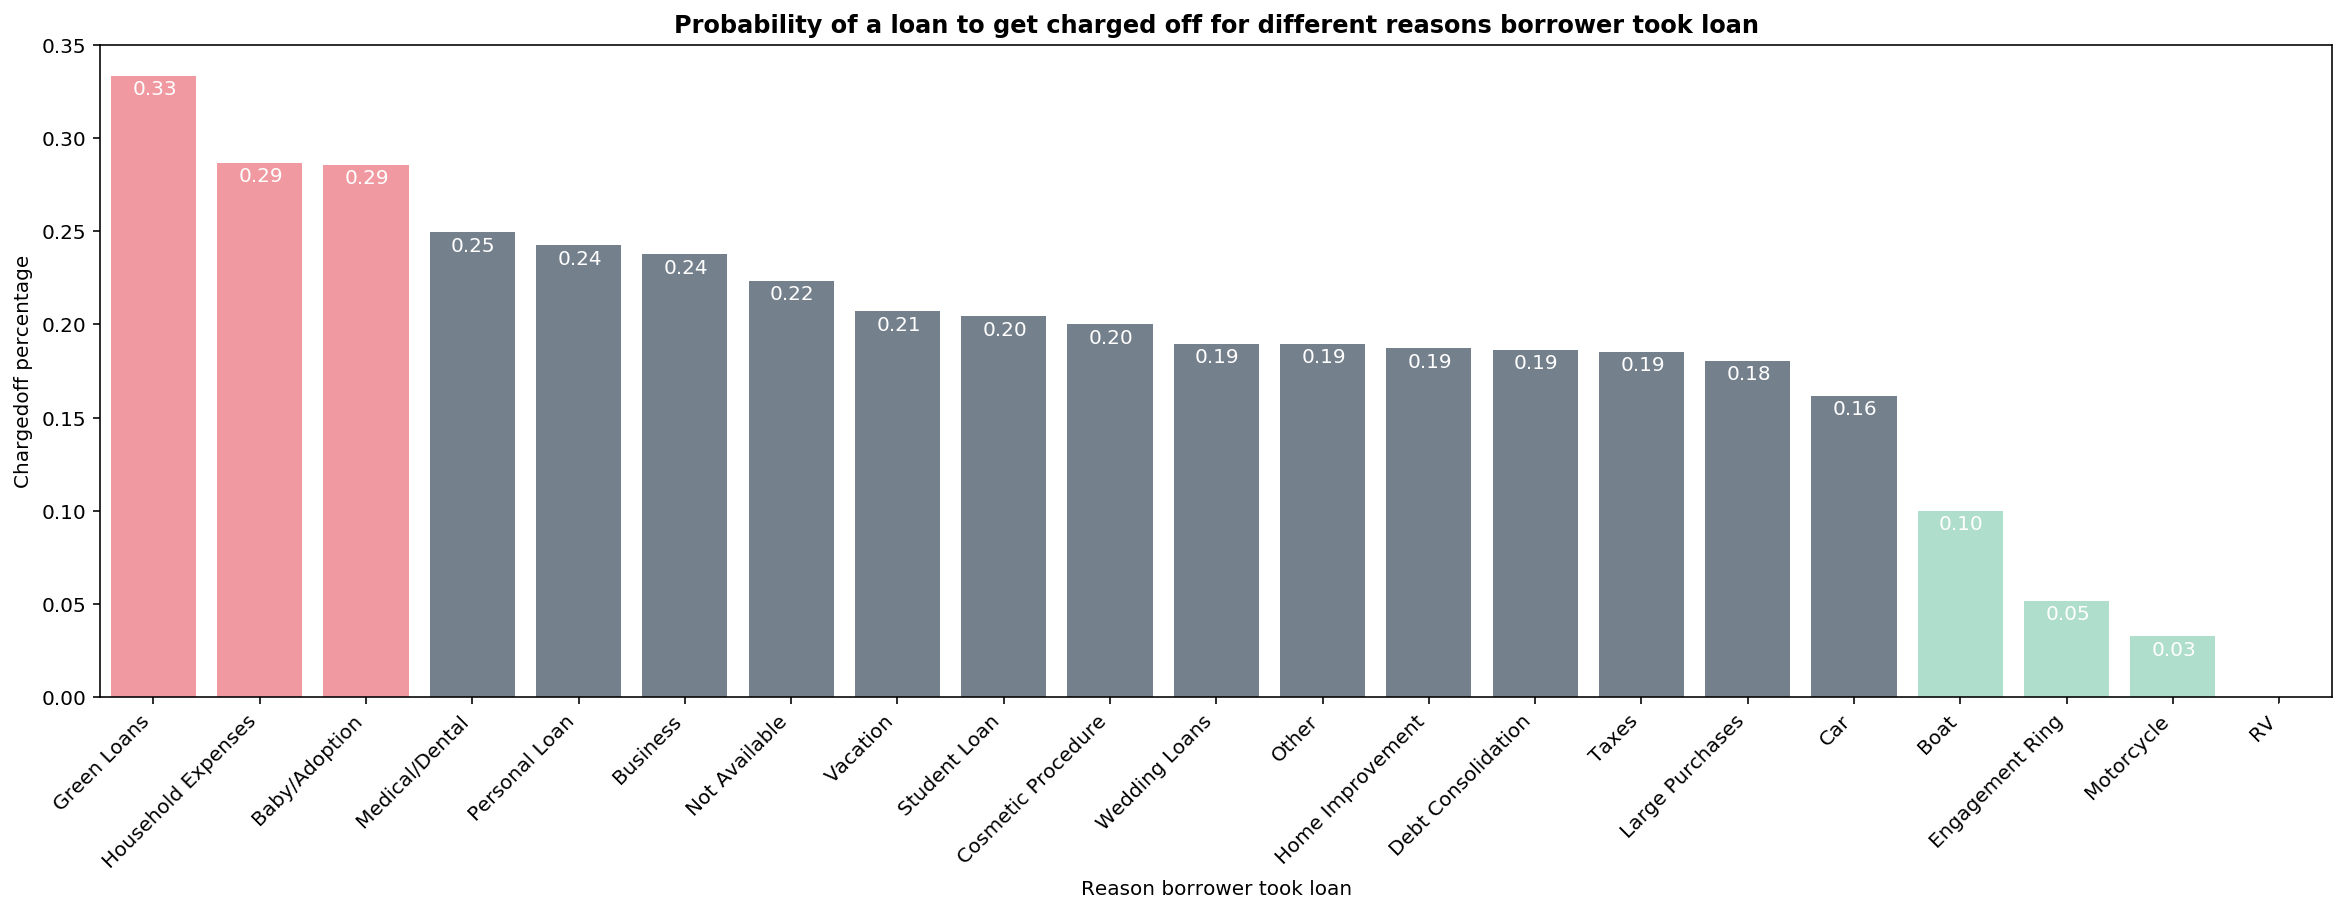

In [84]:
# get a df which only contains the status value chargedoff
chargedoff = outcome_df[outcome_df['status'] == 'Chargedoff']
chargedoff = chargedoff.groupby('reason')['status'].count().reset_index().sort_values('status', ascending = False)

chargedoff_total = outcome_df.groupby('reason')['status'].size().reset_index()
chargedoff_total.head()

reason_chargedoff = pd.merge(chargedoff, chargedoff_total, on = 'reason', how = 'right')
reason_chargedoff['chargedoff_percentage'] = reason_chargedoff.status_x / reason_chargedoff.status_y
reason_chargedoff = reason_chargedoff.sort_values('chargedoff_percentage', ascending = False)
reason_chargedoff.replace(np.NaN, 0, inplace = True)

# plot
clrs = ['#ff8b94' if (x in list(reason_chargedoff.reason.head(3))) else base_color for x in reason_chargedoff.reason]
clrs = np.array(clrs)
clrs[[17, 18, 19]] = '#a8e6cf'

plt.figure(figsize = (20, 6))
sns.barplot(data = reason_chargedoff,
            x = 'reason',
            y = 'chargedoff_percentage',
            palette = clrs)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Chargedoff percentage')
plt.xlabel('Reason borrower took loan')
plt.title('Probability of a loan to get charged off for different reasons borrower took loan',
          weight = 'bold');

xlocs = np.arange(0, 21)
for i, v in enumerate(list(reason_chargedoff.chargedoff_percentage)):
    plt.text(xlocs[i] - 0.2, v - 0.01, "{:.2f}".format(v), color = 'white')

Adjusted by the total count, the graph is now a completely different picture. The highest chargedoff rate regarding the relative amount for each group are Green Loans, Household Expenses and Baby/Adoption. Debt consolidation now ranks at a relative amount of 19 percent.

#### Does the average probability of a loan to get charged off differ for borrowers with different delinquency counts in the past?

In [80]:
# create df which only contains status chargedoff and is grouped by number of delinquencies
delinquencies_chargedoff = outcome_df[outcome_df['status'] == 'Chargedoff']
delinquencies_chargedoff = delinquencies_chargedoff.groupby('number_delinquencies')['status'].size().reset_index()

# -1 first bin because left side is exclusive and I want to catch 0 separate from 1
bins = [-1, 0, 1, 2, 5, 10, 100]
delinquencies_chargedoff['bins'] = pd.cut(delinquencies_chargedoff['number_delinquencies'], bins)
delinquencies_chargedoff.columns = ['number_delinquencies', 'number_chargedoff', 'bins']
# merge df with delinquency total and delinquency chargedoff count
delinquencies_total = outcome_df.groupby('number_delinquencies')['status'].size().reset_index()
delinquencies_total.columns = ['number_delinquencies', 'total_number_loans']
# create delinquencies dataframe
delinquencies = pd.merge(delinquencies_chargedoff, delinquencies_total, on = 'number_delinquencies') 
delinquencies['chargedoff_rate'] = delinquencies['number_chargedoff'] / delinquencies['total_number_loans']
delinquencies.head()

,number_delinquencies,number_chargedoff,bins,total_number_loans,chargedoff_rate
0,0.0,5708,"(-1, 0]",32294,0.176751
1,1.0,446,"(0, 1]",2021,0.220683
2,2.0,327,"(1, 2]",1487,0.219906
3,3.0,430,"(2, 5]",1655,0.259819
4,4.0,349,"(2, 5]",1357,0.257185


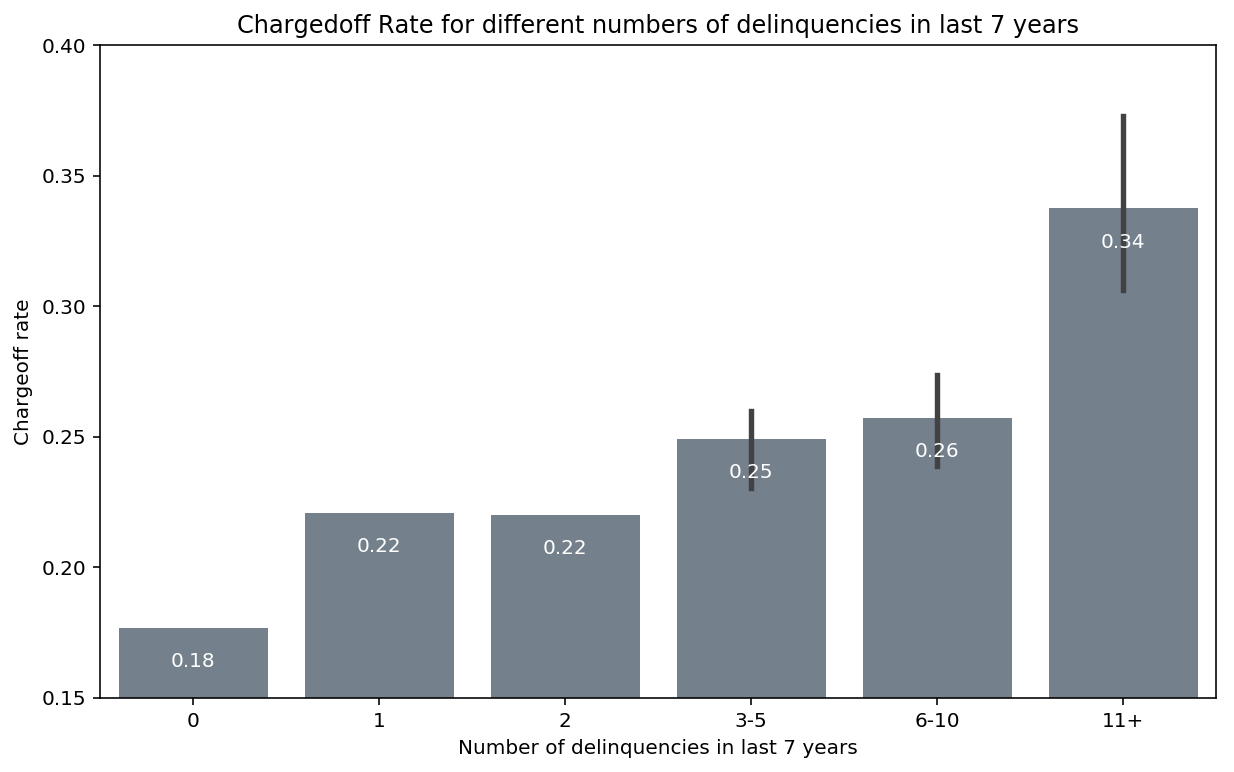

In [81]:
plt.figure(figsize = (10, 6))
sns.barplot(data = delinquencies, x = 'bins', y = 'chargedoff_rate',
            color = base_color)
plt.xticks(np.arange(0, 6), [0, 1, 2, '3-5', '6-10', '11+'])
plt.yticks(np.arange(0, 0.45, 0.05))
plt.ylim(0.15, 0.4)
plt.ylabel('Chargeoff rate')
plt.xlabel('Number of delinquencies in last 7 years')
plt.title('Chargedoff Rate for different numbers of delinquencies in last 7 years')

xlocs = np.arange(0, 7)
delinq_labels = delinquencies.groupby('bins')['chargedoff_rate'].mean().reset_index().sort_values('bins')
for i, v in enumerate(list(delinq_labels.chargedoff_rate)):
    plt.text(xlocs[i] - 0.12, v - 0.015, "{:.2f}".format(v), color = 'white');

It looks like a borrowers past can hint an insight towards his current reliability. Borrowers who did not have a single delinquency in the past 7 years have the on average savest investment as they have the on average lowest chargedoff rate, meaning they are most likely to pay back their loans. The probability of the current loan to get charged off increases with the number of past delinquencies increasing. Borrowers with 11 or more delinquencies in the past have their current loan charged off at a probability of 34 percent.

#### Are homeowners offered a lower APR?

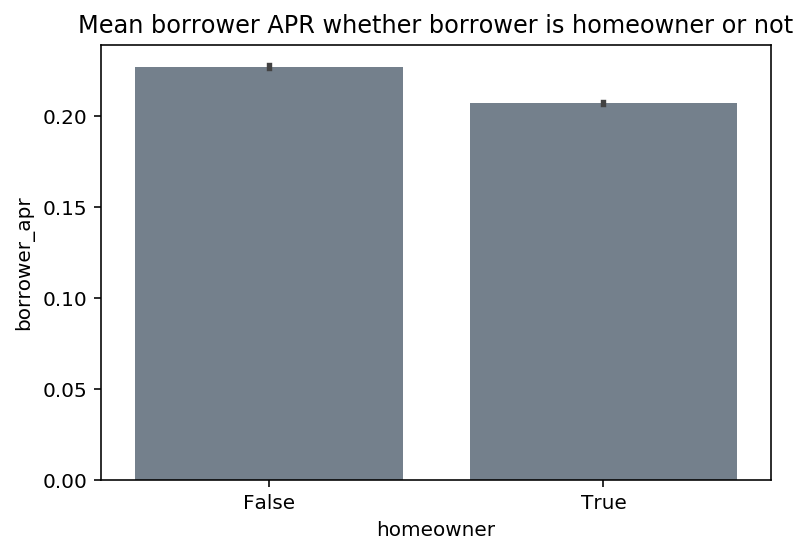

In [66]:
sns.barplot(data = df, x = 'homeowner', y = 'borrower_apr', color = base_color)
plt.title('Mean borrower APR whether borrower is homeowner or not');

A borrower who is already a homeowner is on average offered a lower APR compared to a borrower who is not.

**Are homeowners associated with a lower chargedoff percentage?**

In [82]:
homeowner_df = outcome_df[outcome_df['status'] == 'Chargedoff']
homeowner_df = homeowner_df.groupby('homeowner')['status'].size().reset_index()
homeowner_total = outcome_df.groupby('homeowner')['status'].size().reset_index()
homeowner_df = pd.merge(homeowner_df, homeowner_total, on = 'homeowner')
homeowner_df['chargedoff_percentage'] = homeowner_df.status_x / homeowner_df.status_y
homeowner_df

,homeowner,status_x,status_y,chargedoff_percentage
0,False,5853,27259,0.214718
1,True,4819,24898,0.193550


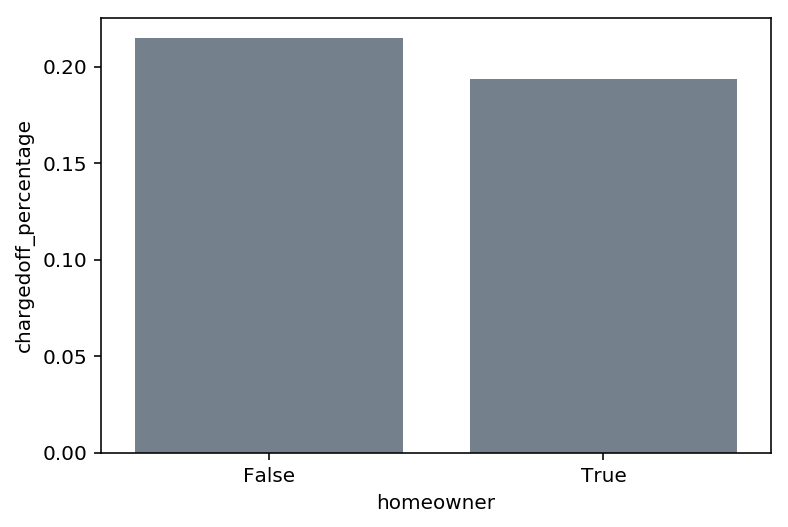

In [83]:
sns.barplot(data = homeowner_df, x = 'homeowner', y = 'chargedoff_percentage',
            color = base_color);

If the borrower is already a homeowner, then they are more likely to pay back their loan.

#### Are there differences for the borrowers APR depending on the state he lives in?

Get a df which is grouped by state and sorted by the mean borrower APR in descending order:

In [67]:
# Get a df which is grouped by state and sorted by the mean borrower APR in descending order
homestate_df = df.groupby('homestate').mean().reset_index().sort_values('borrower_apr', ascending = False)
homestate_df.homestate.head().values

array(['AL', 'AR', 'SD', 'MS', 'NV'], dtype=object)

In [68]:
clrs = ['#ff8b94' if (x in ['AL', 'AR', 'SD', 'MS', 'NV']) else base_color for x in homestate_df.homestate]

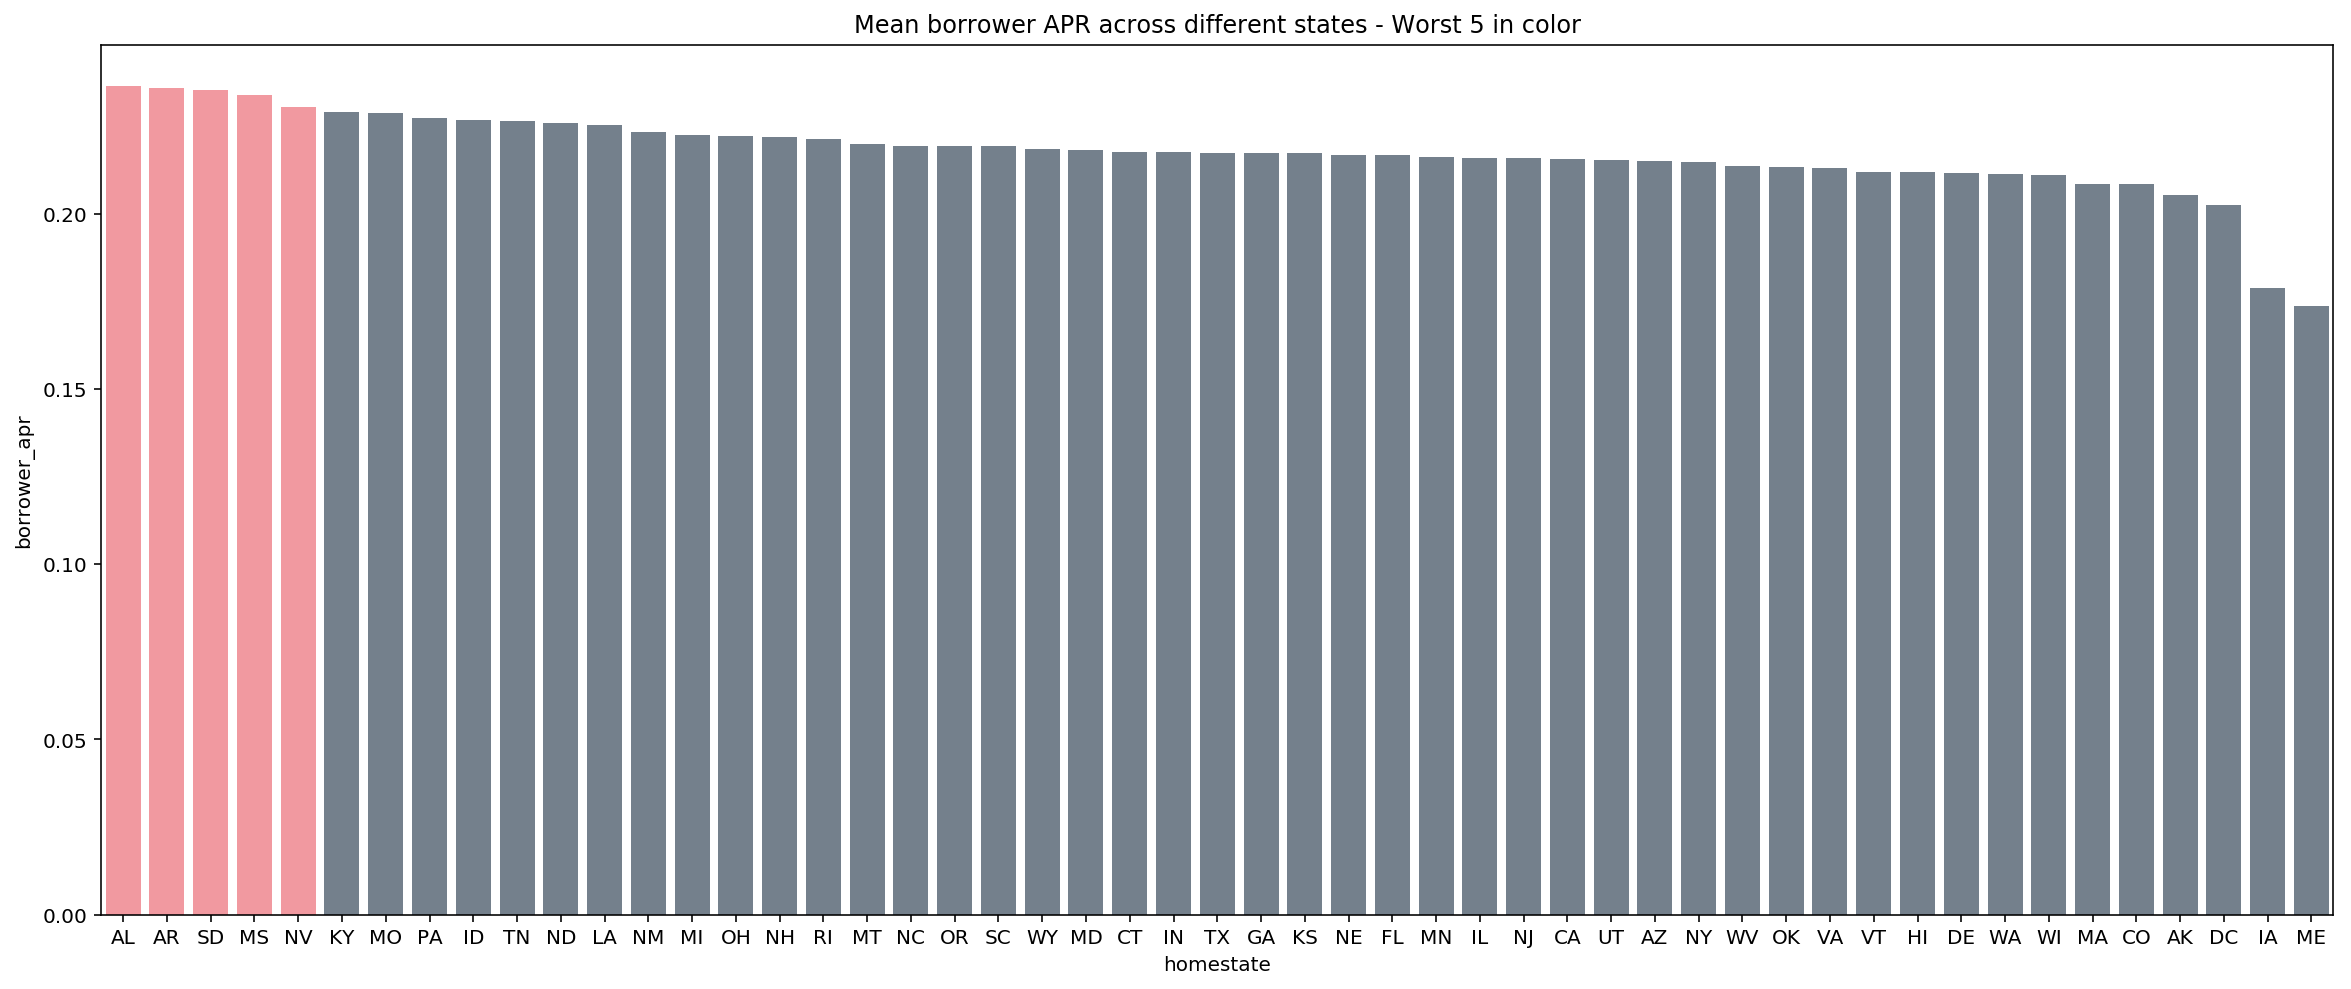

In [69]:
plt.figure(figsize = (20, 8))
sns.barplot(data = df, y = 'borrower_apr', x = 'homestate', order = homestate_df['homestate'], palette = clrs, ci = None)
plt.title('Mean borrower APR across different states - Worst 5 in color');

The APR a borrower is offered changes only marginally among states. Maine and Iowa fall a bit out of the line.

**What about the chargeoff rates for different states?**

In [70]:
homestate_chargedoff = outcome_df[outcome_df['status'] == 'Chargedoff']
homestate_chargedoff = homestate_chargedoff.groupby('homestate')['status'].size().reset_index()
homestate_total = outcome_df.groupby('homestate')['status'].size().reset_index()

homestate_df = pd.merge(homestate_chargedoff, homestate_total, on = 'homestate')
homestate_df['chargedoff_rate'] = homestate_df.status_x / homestate_df.status_y
homestate_df = homestate_df.sort_values('chargedoff_rate', ascending = False)
homestate_df.head()

,homestate,status_x,status_y,chargedoff_rate
21,ME,28,95,0.294737
1,AL,215,827,0.259976
40,SC,96,382,0.251309
27,NC,346,1400,0.247143
18,LA,82,335,0.244776


In [82]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

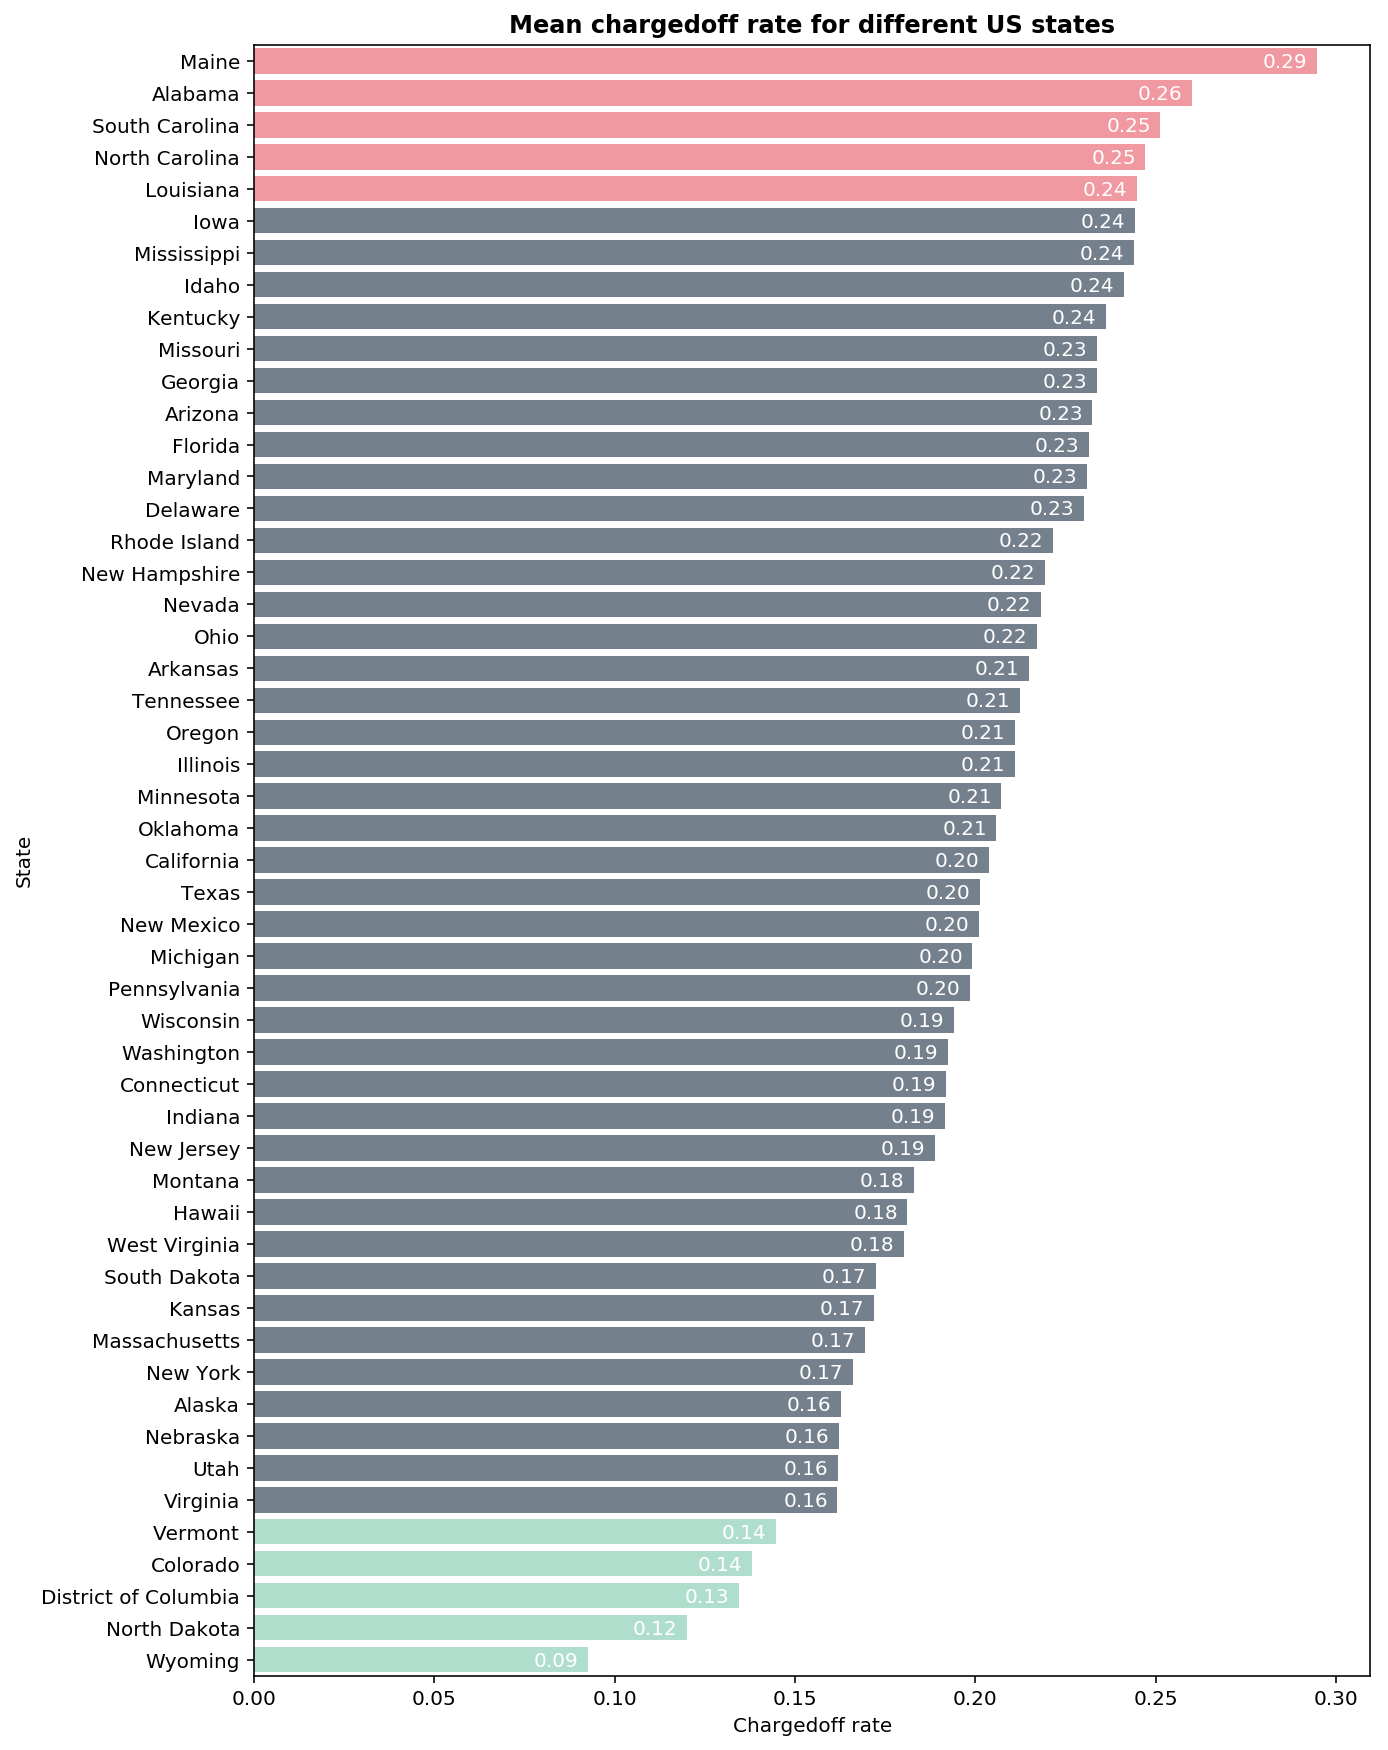

In [88]:
clrs = np.repeat(base_color, 51)
clrs[[0, 1, 2, 3, 4]] = '#ff8b94'
clrs[[46, 47, 48, 49, 50]] = '#a8e6cf'

plt.figure(figsize = (10, 15))
sns.barplot(x = homestate_df.chargedoff_rate,
            y = homestate_df.homestate.map(states),
            palette = clrs)
plt.title('Mean chargedoff rate for different US states', weight = 'bold')
plt.ylabel('State')
plt.xlabel('Chargedoff rate');

xlocs = np.arange(0, 51)
for i, v in enumerate(list(homestate_df.chargedoff_rate)):
    plt.text(v - 0.015, xlocs[i] + 0.2, "{:.2f}".format(v), color = 'white')

Interesting. Although borrowers living in Maine are offered the on average lowest APR, the probability of loan to get charged off is actually highest for borrowers from Maine! Wyoming and North Dakota are the states with the lowest chargedoff percentage.

#### The same data plotted as a choropleth map:

In [87]:
plotly.tools.set_credentials_file(username = 'janikvalentin', api_key = 'hidden')

homestate_df.chargedoff_rate = homestate_df.chargedoff_rate.astype(float)
homestate_df['chargedoff_rate'] = homestate_df.chargedoff_rate.round(2)

for col in homestate_df.columns:
    homestate_df[col] = homestate_df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'], [0.2, 'rgb(218,218,235)'], [0.4, 'rgb(188,189,220)'],\
       [0.6, 'rgb(158,154,200)'], [0.8, 'rgb(117,107,177)'], [1.0, 'rgb(84,39,143)']]

data = [ dict(
        type = 'choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = homestate_df['homestate'],
        z = homestate_df['chargedoff_rate'].astype(float),
        locationmode = 'USA-states',
        text = homestate_df['homestate'].map(states),
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )),
        colorbar = dict(
            title = "Chargedoff Percentage")
        )]

layout = dict(
        title = 'Percentage of loans charged off for different states<br>(Hover for details)',
        geo = dict(
            scope = 'usa',
            projection = dict(type = 'albers usa'),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'))

fig = dict(data = data, layout = layout)
py.iplot(fig, filename = 'Loan-Chargedoff-Percentage')

Resource: [Plotly documentation on choropleth maps](https://plot.ly/python/choropleth-maps/v)

#### Are there differences among borrowers APRs regarding their occupation?

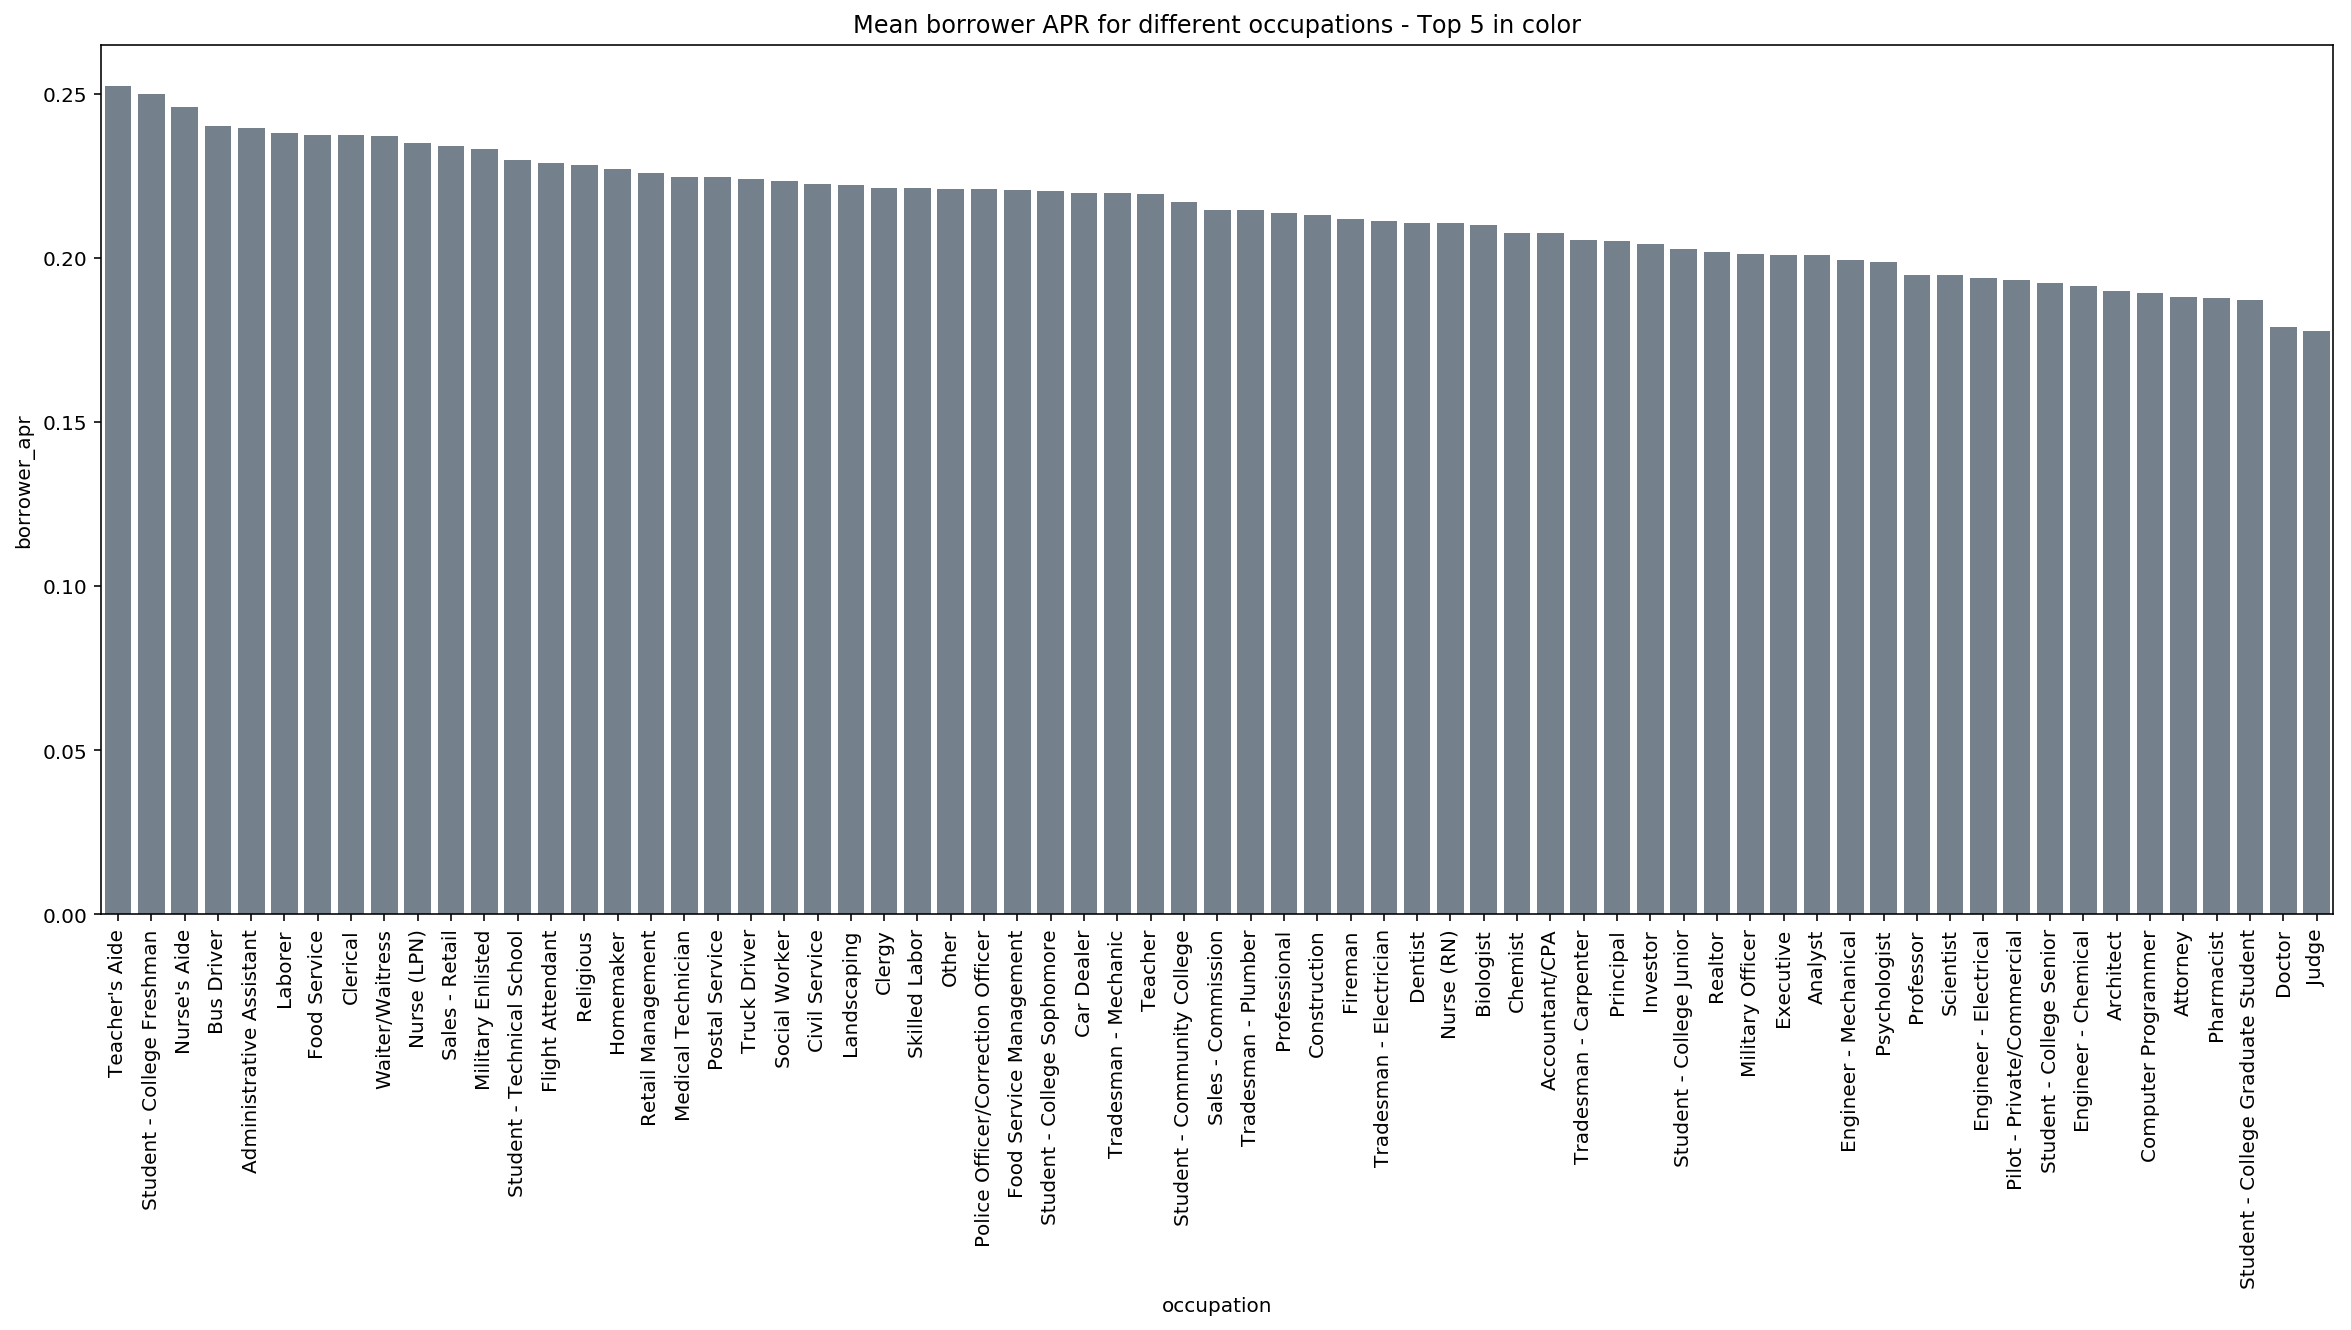

In [72]:
occupation_df = df.groupby('occupation').mean().reset_index().sort_values('borrower_apr', ascending = False)
plt.figure(figsize = (20, 8))
sns.barplot(data = df, x = 'occupation', y = 'borrower_apr', order = occupation_df['occupation'],\
            color = base_color, ci = None)
plt.title('Mean borrower APR for different occupations - Top 5 in color')
plt.xticks(rotation = 90);

Teachers aides, college freshmans and nurse's aides are charged the on average highest aprs. College graduate students, doctors and judges are offered the best conditions.

#### Are there differences in average chargedoff rate among occupations?

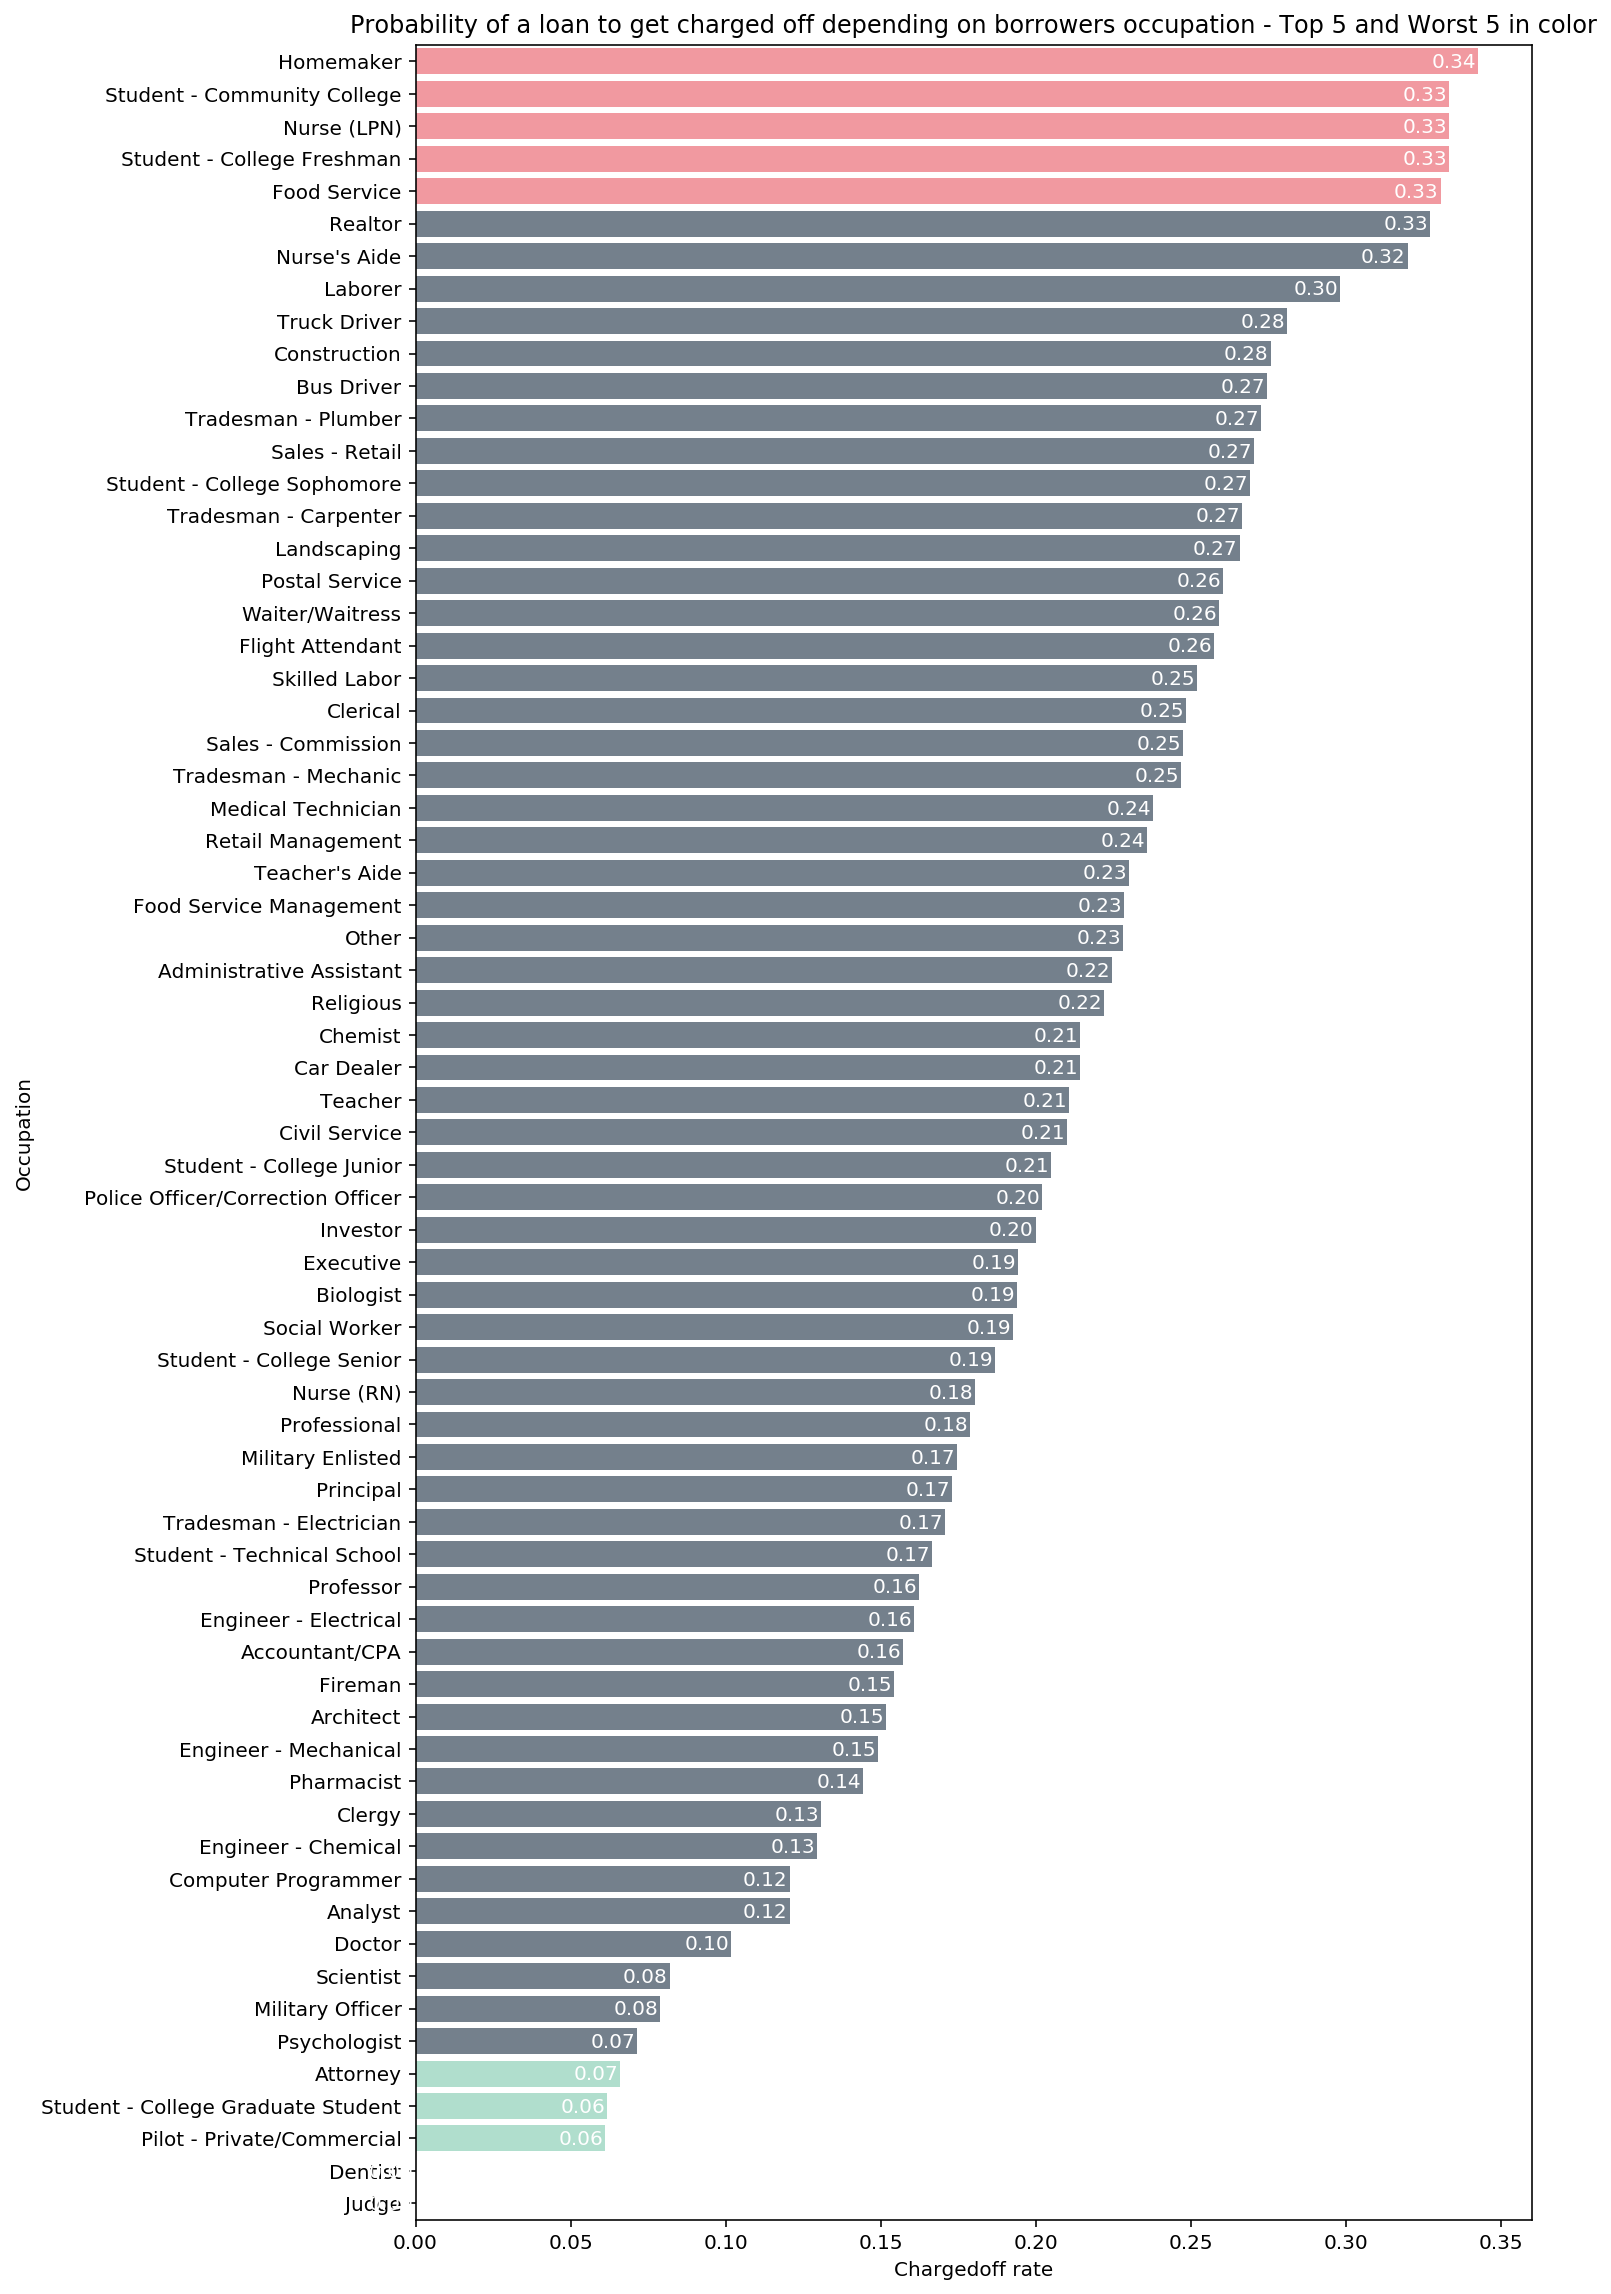

In [73]:
# create df were status is only chargedoff
occupation_chargedoff = outcome_df[outcome_df['status'] == 'Chargedoff']
# groupby occupation
occupation_chargedoff = occupation_chargedoff.groupby('occupation')['status'].size().reset_index()
# get df of all occupations, groupby occupation
occupation_total = outcome_df.groupby('occupation')['status'].size().reset_index()
# merge chargedoff df with total df, how = right ensures all are listed
occupation_chargedoff = pd.merge(occupation_chargedoff, occupation_total, on = 'occupation', how = 'right')
occupation_chargedoff['chargedoff_rate'] = occupation_chargedoff['status_x'] / occupation_chargedoff['status_y']
occupation_chargedoff = occupation_chargedoff.sort_values('chargedoff_rate', ascending = False)

clrs = np.repeat(base_color, 67)
clrs[[0, 1, 2, 3, 4]] = '#ff8b94'
clrs[[62, 63, 64, 65, 66]] = '#a8e6cf'

plt.figure(figsize = (10, 20))
sns.barplot(data = occupation_chargedoff, y = 'occupation', x = 'chargedoff_rate',\
            palette = clrs)
plt.xlabel('Chargedoff rate')
plt.ylabel('Occupation')
plt.title('Probability of a loan to get charged off depending on borrowers occupation \
- Top 5 and Worst 5 in color');
# value labels
xlocs = np.arange(0, 67)
datalabels = np.array(list(occupation_chargedoff.chargedoff_rate))
datalabels[[65, 66]] = 0 # assign NaN as 0 to allow plotting
for i, v in enumerate(datalabels):
    plt.text(v - 0.015, xlocs[i] + 0.2, "{:.2f}".format(v), color = 'white')

Not a single loan taken by a dentis and judge has be charged off so far. Homemakers and community college students have on average 34 (33) percent of their loans charged off.

#### What about the borrowers employment status?

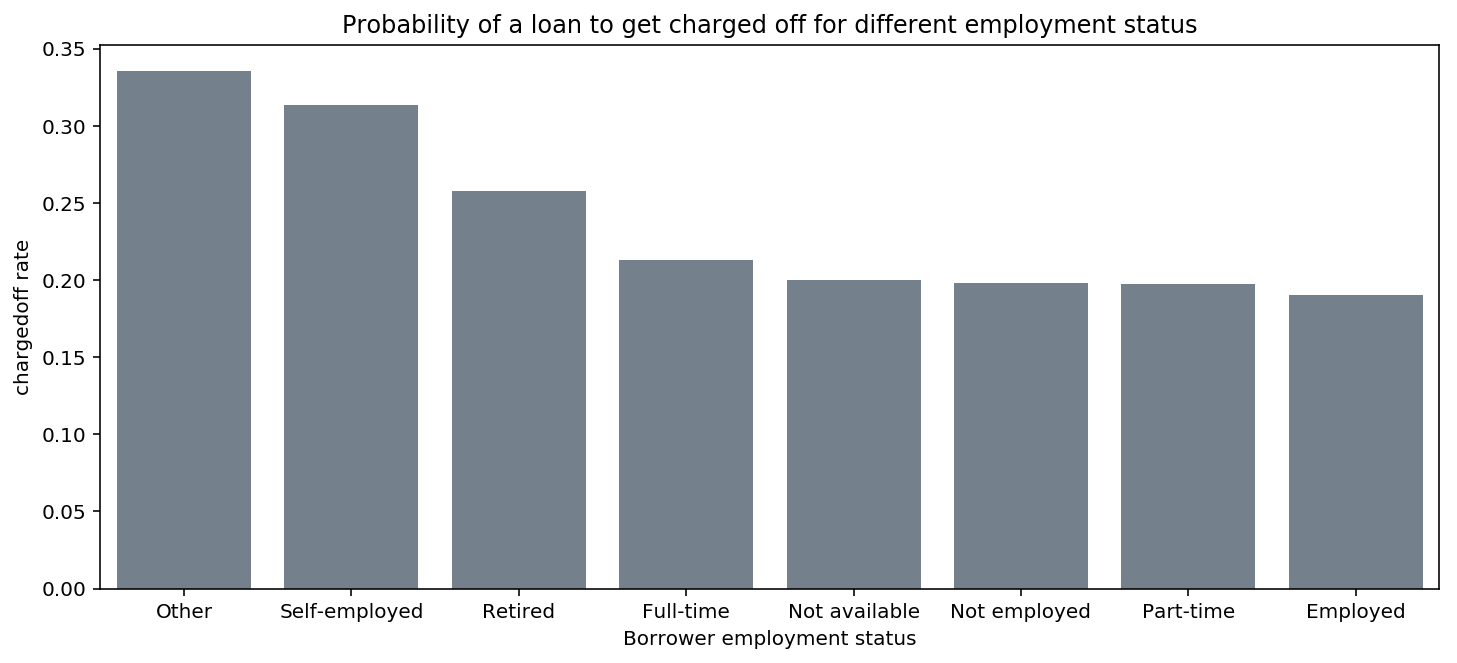

In [111]:
# get a chargedoff df and group by employment_status, sort by outcome descending
chargedoff = outcome_df[outcome_df['status'] == 'Chargedoff']
chargedoff = chargedoff.groupby('employment_status')['status'].count().reset_index().sort_values('status',ascending = False)
# create a column total count which is the total employment status count of every oucome
status_total = pd.DataFrame.from_dict(dict(outcome_df.groupby('employment_status')['status'].count()),\
                                      orient = 'index').reset_index()
status_total.columns = ['employment_status', 'total_count']
# get the chargedoff percentage for each employment group
chargedoff_employment = pd.merge(chargedoff, status_total, on = 'employment_status')
chargedoff_employment['chargedoff_percentage'] = chargedoff_employment.status / chargedoff_employment.total_count
chargedoff_employment = chargedoff_employment.sort_values('chargedoff_percentage', ascending = False)

plt.figure(figsize = (12, 5))
sns.barplot(data = chargedoff_employment, x = 'employment_status', y = 'chargedoff_percentage',\
            color = base_color)
plt.title('Probability of a loan to get charged off for different employment status')
plt.ylabel('chargedoff rate')
plt.xlabel('Borrower employment status');

When the borrower specified their employment status as ``Other``, ``Self_employed`` or ``Retired``, then they are on average much more likely to not pay back their loan. Among the other groups, there is little to no difference.

### Multivariate Exploration

#### Development of interest rates over time

In [75]:
# group by year, compute mean value for all columns
groupby_year = df.groupby(df.date.dt.year).mean().reset_index()
groupby_year

,date,id,loan_amount,credit_rating,borrower_apr,lender_yield,bank_yield,monthly_income,income_verifiable,monthly_loan_payment,debt_ratio,homeowner,employment_status_duration,credit_utilization,number_delinquencies
0,2006,3.916114e+04,4793.508091,3.236295,0.200965,0.183029,0.017936,4493.030053,1.0,169.003137,0.219339,0.325793,NaN,NaN,8.061776
1,2007,1.602048e+05,6946.376547,3.927365,0.185946,0.164841,0.021106,4573.981299,1.0,242.841539,0.291230,0.450628,65.675018,0.540869,6.182395
2,2008,3.325381e+05,5861.864943,4.227031,0.203517,0.175945,0.027572,4569.272921,1.0,203.083745,0.253222,0.470229,71.486055,0.564430,4.320515
3,2009,4.287924e+05,4572.307964,4.287802,0.215034,0.182173,0.032860,5094.277722,1.0,161.925403,0.228174,0.572077,83.782762,0.504768,2.335685
4,2010,4.656456e+05,4967.869862,3.896096,0.237176,0.201246,0.035930,5266.218963,1.0,174.561661,0.229481,0.543276,87.877610,0.521306,2.949391
5,2011,5.199758e+05,6725.679627,3.663594,0.256612,0.214865,0.041747,5395.706985,1.0,247.171660,0.253837,0.533019,95.415974,0.533314,4.019240
6,2012,6.112169e+05,7942.317602,3.793311,0.248585,0.205833,0.042752,5505.888741,1.0,263.055918,0.265585,0.539426,100.928014,0.528149,4.121946
7,2013,8.976883e+05,10676.720177,4.282265,0.212298,0.172109,0.040189,5897.616453,1.0,326.907570,0.265414,0.542002,111.679836,0.602169,3.861844
8,2014,1.162043e+06,11878.863326,4.713515,0.182778,0.143857,0.038921,6006.771973,1.0,359.602404,0.260407,0.528262,105.990529,0.596040,3.295651


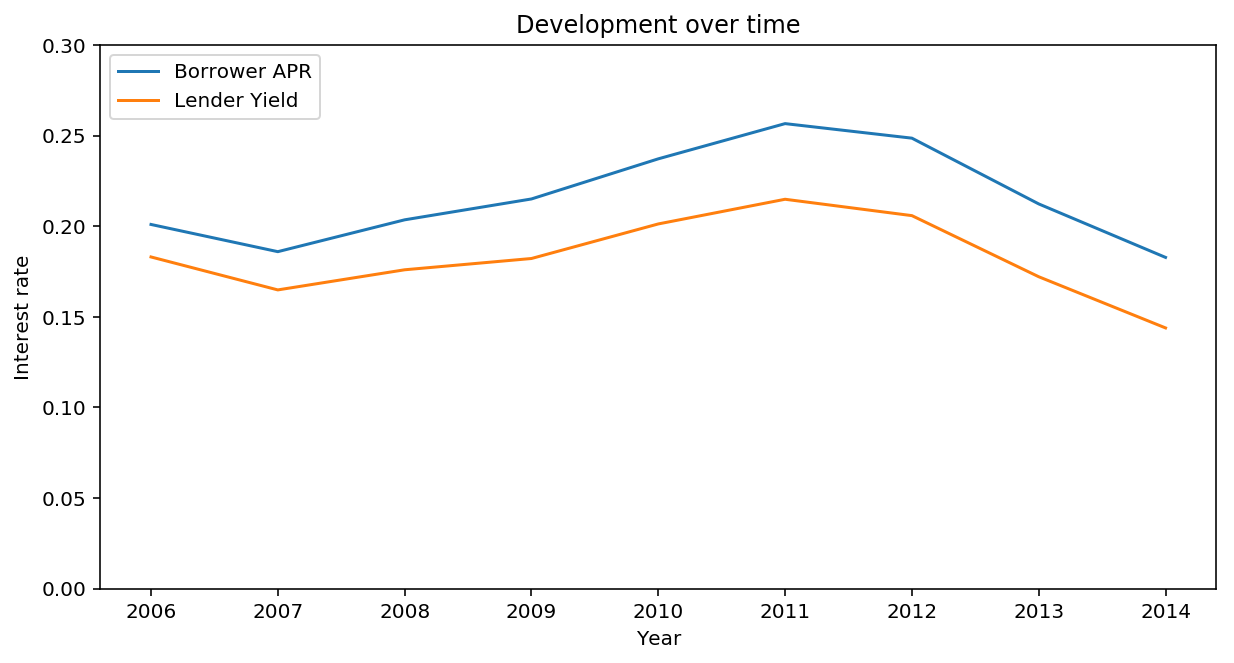

In [76]:
# development of borrower apr and lender yield plot
plt.figure(figsize = (10, 5))
plt.plot(groupby_year.date, groupby_year.borrower_apr)
plt.plot(groupby_year.date, groupby_year.lender_yield)
plt.ylim([0, 0.3])
plt.title('Development over time')
plt.xlabel('Year')
plt.ylabel('Interest rate')
plt.legend(['Borrower APR', 'Lender Yield'], loc = 'upper left');

There is about a 5 percent interest rate change for both, borrower APR and lender yield, between the on average lowest interest rates in 2007 to the on average highest interest rates in 2011. Also visible is an increasing gap between the borrowers APR and the lenders yield. I want to investigate this in more detail.

#### Other time series exploration (not multivariate)

Investigating the change in difference between the borrowers apr and the lenders yield (prospers share).

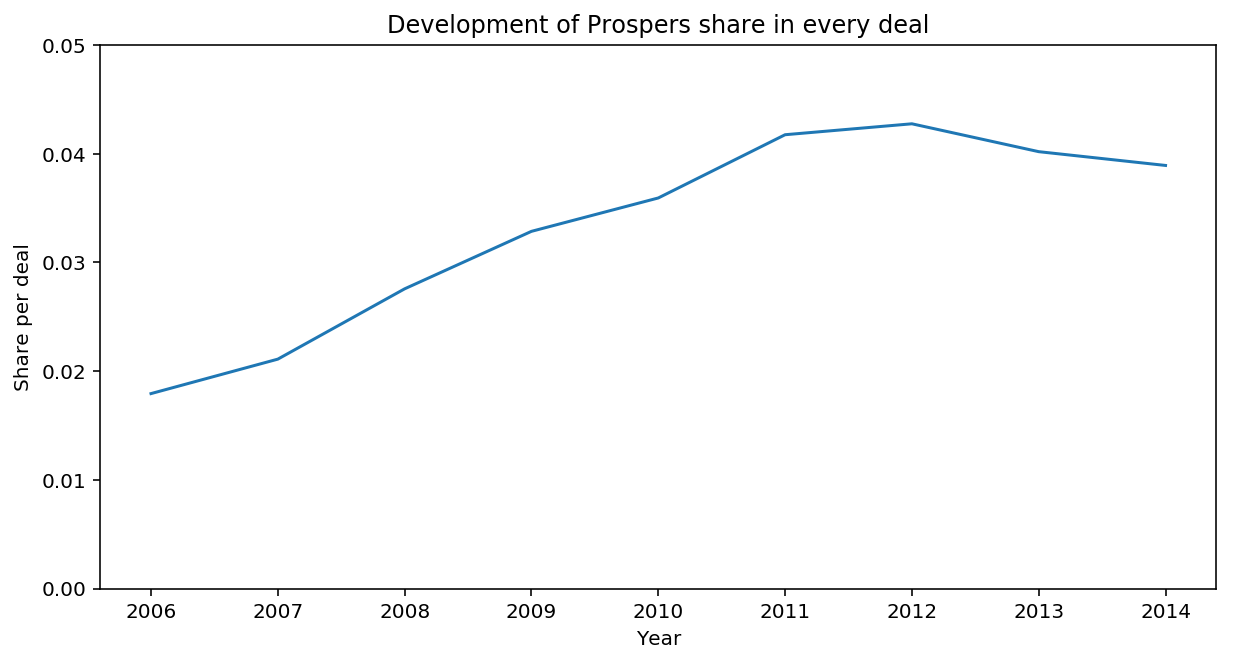

In [77]:
plt.figure(figsize = (10, 5))
plt.plot(groupby_year.date, groupby_year.bank_yield)
plt.ylim([0, 0.05])
plt.title('Development of Prospers share in every deal')
plt.xlabel('Year')
plt.ylabel('Percentage');

Prospers share in every deal nearly doubled from 2 percent in 2006 to 4 percent in 2014. This is not a good trend for investors since this means that they were offered a 2 percentage points higher return for the same loan in 2006. 

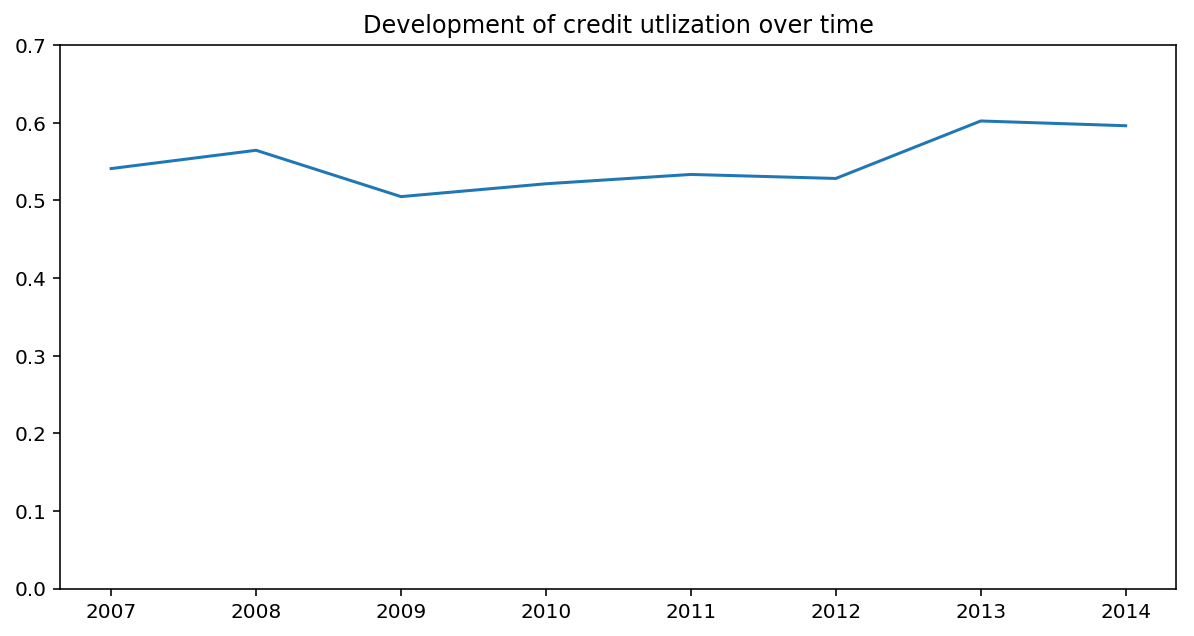

In [79]:
plt.figure(figsize = (10, 5))
plt.plot(groupby_year.date, groupby_year.credit_utilization)
plt.ylim(0, 0.7)
plt.title('Development of credit utlization over time');

The amount of credit utilization has not changed significantly in the past 7 years.

#### Final thoughts

The exploration of different variables revealed a ton of useful insights in the American peer-to-peer loan market.